In [249]:
from scipy.optimize import curve_fit
from misc_utilities import *
%matplotlib notebook

<IPython.core.display.Javascript object>


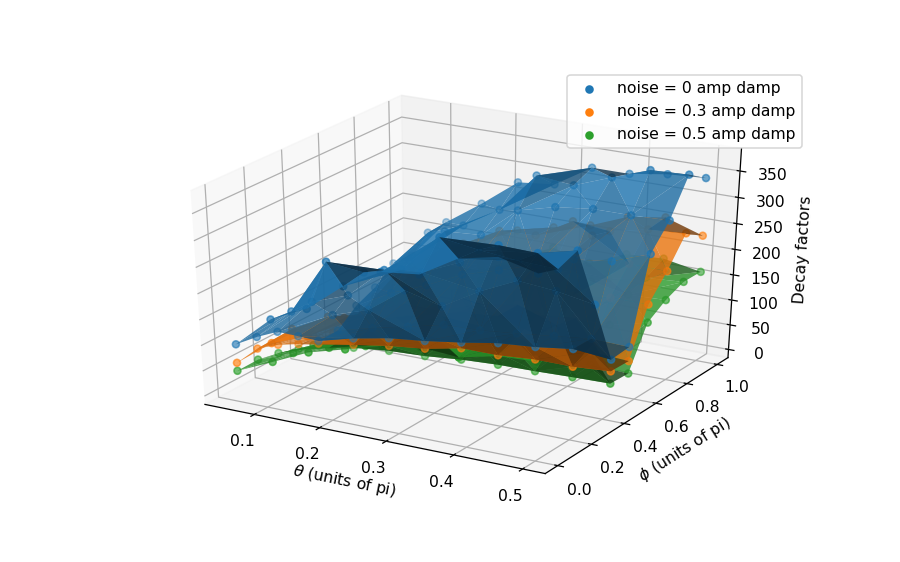

In [250]:
%matplotlib notebook
#def func(x, b, c):
#     return np.exp((0.001*(-b * x))) + c

def func(x, b, c):
     return b*x**(-0.5) + 0*np.exp(-0.01*(x*c))
    
def decay_param(file, measurements, xcutoff=9900, ycutoff = 5, w=1):
    with open(file, "rb") as handle:
        c = pickle.load(handle)
    mcn, m = ma(c, w)[np.where(ma(c, w) < ycutoff)], ma(measurements, w)[np.where(ma(c, w) < ycutoff)]
    mcn, m = mcn[np.where(m < xcutoff)], m[np.where(m < xcutoff)]
    popt, pcov = curve_fit(func, m, mcn, p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    return 1000 / popt[0]

def decs(file_format, qplist, noise, measurements=np.arange(10, 10000, 20)):
    ampdamps = []
    failed = []
    for i in range(len(qplist)):
        try:
            ampdamps.append(decay_param(file_format.format(int(noise*100), i), measurements = measurements))
        except FileNotFoundError as e:
            failed.append(i)
        except TypeError as e:
           failed.append(i)
        except ValueError as e:
          failed.append(i)
    qps = np.array(qplist)[[i for i in range(len(qplist)) if i not in failed]]
    return ampdamps, qps


qplist = [[[theta, phi], [0.5*np.pi, np.pi*0.5]] for theta in np.linspace(0, 0.5*np.pi, 10) for phi in np.linspace(0, np.pi, 10)]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(8, 5))
ax0 = fig.add_subplot(111, projection='3d')
for noise in [0, 0.3, 0.5]:
    ampdamps, qps = decs("xnoisesingle/ax1_0_rotx90{}n_{}maxis4.pickle", qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
    ax0.scatter(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, marker='o', label='noise = {} amp damp'.format(noise)) #c='r')
    ax0.plot_trisurf(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, linewidth=0, alpha=0.8)#, color='orange')
ax0.set_xlabel(r'$\theta$ (units of pi)')
ax0.set_ylabel(r'$\phi$ (units of pi)')
ax0.set_zlabel('Decay factors')
ax0.legend()

<IPython.core.display.Javascript object>


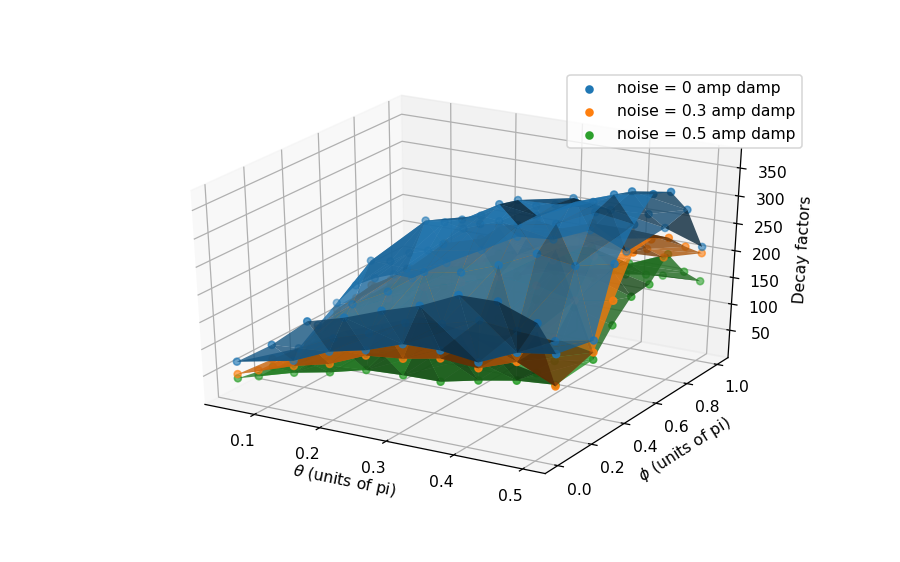

In [251]:
qplist = [[[theta, phi], [0.5*np.pi, np.pi*0.5]] for theta in np.linspace(0, 0.5*np.pi, 10) for phi in np.linspace(0, np.pi, 10)]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(8, 5))
ax0 = fig.add_subplot(111, projection='3d')
for noise in [0,0.3,0.5]:
    ampdamps, qps = decs("twoaxisrotz/twoaxisrot/yaxis_93/dephase{}n_{}maxis7.pickle", qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
    ax0.scatter(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, marker='o', label='noise = {} amp damp'.format(noise)) #c='r')
    ax0.plot_trisurf(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, linewidth=0, alpha=0.8)#, color='orange')
ax0.set_xlabel(r'$\theta$ (units of pi)')
ax0.set_ylabel(r'$\phi$ (units of pi)')
ax0.set_zlabel('Decay factors')
ax0.legend()


<IPython.core.display.Javascript object>


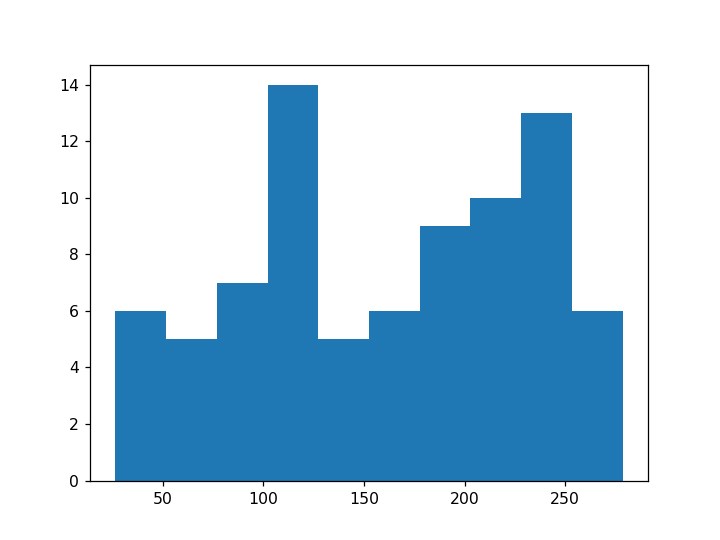

array([[[1.57079633, 2.44346095],
        [1.57079633, 1.57079633]]])

In [100]:
ampdamps, qps = decs("twoaxisrotz/twoaxisrot/yaxis_94/depol{}n_{}maxis7.pickle", qplist=qplist, noise=0.3, measurements=np.arange(10, 10000, 20))
plt.figure()
plt.hist(ampdamps, bins=10)
qps[np.where(np.array(ampdamps) == np.max(np.array(ampdamps)))]

In [252]:
np.sort(np.array(ampdamps))[-10:]

array([204.10894265, 206.13376349, 207.70572941, 211.88091459,
       215.03483984, 217.62877954, 217.90151733, 219.28890674,
       223.32119249, 235.33470835])

In [253]:
qplists = [[[[theta, phi], [theta2, phi2]] for theta in np.linspace(0, np.pi*0.5, 10) for phi in np.linspace(0, np.pi, 10)] for theta2 in np.linspace(0, np.pi*0.5, 10) for phi2 in np.linspace(0, np.pi, 10) ]

## Search algo for finding optimal points from two axis rotations

In [254]:
opt_channels = {}
count = 0
for channel in ["rotx90", "ampdamp", "dephase", "depol"]:
   
    for noise in [0, 0.3, 0.5]:
        maxx, k, maxval, p1, p2 = 0, 0, 0, 0, 0
        ortmax, ortk = 0, 90
        for i in range(60, 100):
            ampdamps, qps = decs("twoaxisrotz/twoaxisrot/yaxis_{}/{}{}n_{}maxis7.pickle".format(i, channel, "{}", "{}"), qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
            j = np.mean(np.sort(np.array(ampdamps))[-8:])
            if j > ortmax:
                if j > maxx:
                    maxx = j
                    k = i
                    maxval = np.mean(np.sort(np.array(ampdamps))[-3])
                    t = np.where(np.array(ampdamps) == maxval)
                    p1, p2 = qps[np.where(np.array(ampdamps) == maxval)][0][0][0], qps[np.where(np.array(ampdamps) == maxval)][0][0][1]

#            if i == ortk:
#                ortmax = np.mean(np.sort(np.array(ampdamps))[-1])
                
            #print(np.mean(np.sort(np.array(ampdamps))[-3:]), i, len(qps))
        k1 = np.round(p1 / np.pi, 3)
        k2 = np.round(p2 / np.pi, 3)
        k3 = np.round(qplist[k][0][0] / np.pi, 3)
        k4 = np.round(qplist[k][0][1] /np.pi, 3)
        
        xi = 0
        for i in range(len(qplists[k])):
            if np.allclose(qplists[k][i][0],  np.array([p1, p2])):
                xi=i

        opt_channels[str(channel+str(int(noise*100)))] = [k, xi]   # xi, yi
        
        m = 100*((maxval - ortmax) / ortmax)
    
        print("channel={}, max by {}% at (theta_x, phi_x = {},{}),  (thetay, phiy = {},{}) with e = {}, inx = {}".format(channel, np.round(m, 3), k1, k2, k3, k4, noise, k))
        count+=1
        
        
        

C:\Users\mirta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars


channel=rotx90, max by inf% at (theta_x, phi_x = 0.444,1.0),  (thetay, phiy = 0.444,0.667) with e = 0, inx = 86
channel=rotx90, max by inf% at (theta_x, phi_x = 0.444,0.0),  (thetay, phiy = 0.5,0.556) with e = 0.3, inx = 95
channel=rotx90, max by inf% at (theta_x, phi_x = 0.444,0.667),  (thetay, phiy = 0.5,0.333) with e = 0.5, inx = 93
channel=ampdamp, max by inf% at (theta_x, phi_x = 0.444,0.222),  (thetay, phiy = 0.444,0.667) with e = 0, inx = 86
channel=ampdamp, max by inf% at (theta_x, phi_x = 0.278,0.889),  (thetay, phiy = 0.444,0.556) with e = 0.3, inx = 85
channel=ampdamp, max by inf% at (theta_x, phi_x = 0.444,0.111),  (thetay, phiy = 0.444,0.778) with e = 0.5, inx = 87
channel=dephase, max by inf% at (theta_x, phi_x = 0.444,0.111),  (thetay, phiy = 0.5,0.667) with e = 0, inx = 96
channel=dephase, max by inf% at (theta_x, phi_x = 0.389,0.667),  (thetay, phiy = 0.444,0.333) with e = 0.3, inx = 83
channel=dephase, max by inf% at (theta_x, phi_x = 0.5,0.0),  (thetay, phiy = 0.5,0.

In [102]:
yi, xi = opt_channels["rotx900"]
maxis = qplists[yi][xi]
maxis / np.array(np.pi)

array([[0., 0.],
       [0., 0.]])

In [103]:
opt_channels

{'rotx900': [0, 0],
 'rotx9030': [0, 0],
 'rotx9050': [93, 87],
 'ampdamp0': [86, 79],
 'ampdamp30': [85, 80],
 'ampdamp50': [87, 91],
 'dephase0': [96, 71],
 'dephase30': [83, 85],
 'dephase50': [94, 76],
 'depol0': [95, 77],
 'depol30': [0, 0],
 'depol50': [94, 87]}

In [104]:
np.array(qplists[88][65]) / np.pi

array([[0.33333333, 0.55555556],
       [0.44444444, 0.88888889]])

In [105]:
list(opt_channels.keys())[6]

'dephase0'

In [106]:
channels = [x_rotation, x_rotation, x_rotation, damp, damp, damp, dephase, dephase,dephase, dep(0.2), dep(0.2), dep(0.2)]
noises = [0, 0.3, 0.5, 0, 0.3, 0.5, 0, 0.3, 0.5, 0, 0.3, 0.5]
len(noises) == len(channels)

True

In [107]:
opt_channels

{'rotx900': [0, 0],
 'rotx9030': [0, 0],
 'rotx9050': [93, 87],
 'ampdamp0': [86, 79],
 'ampdamp30': [85, 80],
 'ampdamp50': [87, 91],
 'dephase0': [96, 71],
 'dephase30': [83, 85],
 'dephase50': [94, 76],
 'depol0': [95, 77],
 'depol30': [0, 0],
 'depol50': [94, 87]}

In [242]:
opt_channels = {'rotx900': [0, 0],
 'rotx9030': [0, 0],
 'rotx9050': [93, 87],
 'ampdamp0': [86, 79],
 'ampdamp30': [85, 80],
 'ampdamp50': [87, 91],
 'dephase0': [96, 71],
 'dephase30': [83, 85],
 'dephase50': [94, 76],
 'depol0': [95, 77],
 'depol30': [0, 0],
 'depol50': [94, 87]}

## Testing out different configurations here from generated data

<IPython.core.display.Javascript object>


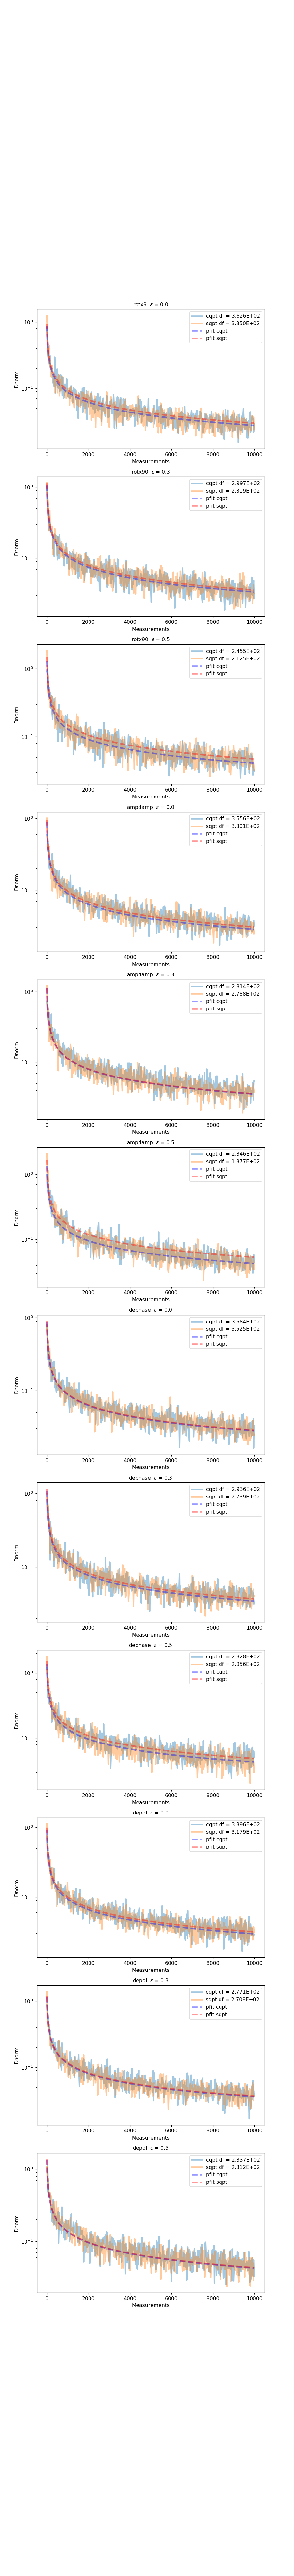

In [257]:
def func(x, b):
    return b*x**(-0.5)

fig, ax = plt.subplots(nrows=len(opt_channels), ncols=1, figsize=(8, 70))
if len(opt_channels) == 1:
    ax = [ax]

w=1   # smooth out the noise by choosing a moving average window
xcutoff = 9900  # cutoffs for fitting decay curve ansatz
ycutoff = 5
w2=1
measurements = ma(np.arange(10,10000, 20), w)
measurements2 = ma(np.arange(10,10000, 20), 1)
for figi, i in enumerate(list(opt_channels.keys())):
    yi, xi = opt_channels[i]
    
    with open("twoaxisrotz/twoaxisrot/yaxis_{}/{}n_{}maxis7.pickle".format(yi, i, xi), "rb") as handle:
        c1n = pickle.load(handle)

    with open("tests/sqpt_{}n_maxis.pickle".format(i), "rb") as handle:
        c2n = pickle.load(handle)
    
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    

    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1), maxfev=6000)
    slope1 = popt[0]
    

    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc2n, w2), p0=(1), maxfev=6000)
    slope2= popt[0]
    
    ax[figi].semilogy(measurements, ma(c1n, w), '-', alpha=0.4, linewidth=3.0, label='cqpt df = {:.3E}'.format(1000/slope1))
    ax[figi].semilogy(measurements, ma(c2n, w), '-', alpha=0.4, linewidth=3.0, label='sqpt df = {:.3E}'.format(1000/slope2))    
    
    ax[figi].semilogy(measurements, func(measurements, slope1), 'b--',alpha=0.4, linewidth=3.0, label='pfit cqpt')

    ax[figi].semilogy(measurements, func(measurements, slope2), 'r--',alpha=0.4, linewidth=3.0, label='pfit sqpt')
    
    ax[figi].set_xlabel("Measurements", fontsize=10)
    
    ax[figi].tick_params(axis='both', which='major', labelsize=10)
#ax[1].tick_params(axis='both', which='major', labelsize=10)
    ax[figi].set_xlabel("Measurements", fontsize=10)
    ax[figi].set_ylabel("Dnorm", fontsize=10)
    if i[-2:-1].isdigit() == False:
        noise = 0
        cname = i[:-1]
    else:
        noise = int(i[-2:])
        cname = i[:-2]
    ax[figi].set_title(r"{}  $\epsilon$ = {}".format(cname, noise/100.), fontsize=10)
#ax[1].set_title("Amplitude damping (C4) noise = 0.5", fontsize=10)
#ax[1].set_ylabel("Dnorm", fontsize=10)

    ax[figi].legend(fontsize=10)
#ax[1].legend(fontsize=10)

<IPython.core.display.Javascript object>


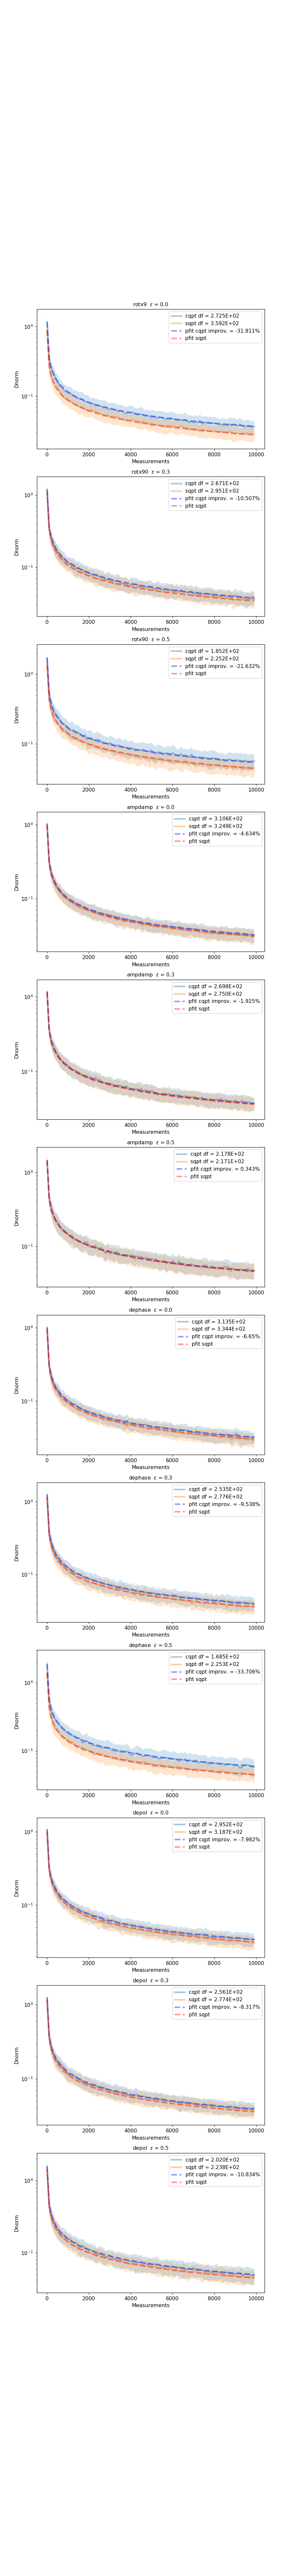

In [325]:
opt_channels = {'rotx900': [86, 89],
 'rotx9030': [95, 80],
 'rotx9050': [93, 86],
 'ampdamp0': [86, 82],
 'ampdamp30': [85, 58],
 'ampdamp50': [87, 81],
 'dephase0': [96, 81],
 'dephase30': [83, 76],
 'dephase50': [94, 90],
 'depol0': [95, 89],
 'depol30': [98, 72],
 'depol50': [94, 96]}
improvs = {}
err_bars = {}

opts = []

fig, ax = plt.subplots(nrows=len(opt_channels), ncols=1, figsize=(8, 70))
if len(opt_channels) == 1:
    ax = [ax]
w=1   # smooth out the noise by choosing a moving average window
xcutoff = 9900  # cutoffs for fitting decay curve ansatz
ycutoff = 10
w2=1
w3 = 1
measurements = ma(np.arange(10,10000, 100), w)
measurements2 = ma(np.arange(10,10000, 100), 1)
iterates=100
for figi, i in enumerate(list(opt_channels.keys())):
    yi, xi = opt_channels[i]

#    with open("twoaxisrotz/twoaxisrot/yaxis_{}/{}n_{}maxis7.pickle".format(yi, i, xi), "rb") as handle:
#        c1n = pickle.load(handle)

#    with open("tests/sqpt_{}n_maxis.pickle".format(i), "rb") as handle:
#        c2n = pickle.load(handle)
    iterations = iterates
    norm_it = iterations
    c1n, c2n = np.zeros_like(measurements), np.zeros_like(measurements)
    c1n2, c2n2 = np.zeros_like(measurements), np.zeros_like(measurements)

    for iteration in range(1, iterations+1, 1):
        
        try:
            with open("tests/cqpt_{}{}n_it_{}.pickle".format(i, int(noises[figi]*100), iteration), "rb") as handle:
                c1nv = pickle.load(handle)
                c1n += np.array(c1nv)
                c1n2 += np.array(c1nv)*np.array(c1nv) 

            with open("tests/sqpt_{}n_it_{}.pickle".format(i, iteration), "rb") as handle:
                c2nv = pickle.load(handle)
                c2n += np.array(c2nv)
                c2n2 += np.array(c2nv)*np.array(c2nv)
        except FileNotFoundError as e:
            norm_it -= 1
        
            
    c1n /= norm_it
    c2n /= norm_it
    c1n2 /= norm_it
    c2n2 /= norm_it
    
    c1ne = np.sqrt(c1n2 - c1n*c1n)
    c2ne = np.sqrt(c2n2 - c2n*c2n)
    
    
    
    
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    

    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1), maxfev=6000)
    slope1 = popt[0]
    

    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc2n, w2), p0=(1), maxfev=6000)
    slope2 = popt[0]
    
    ax[figi].semilogy(measurements, ma(c1n, w), '-', alpha=0.4, linewidth=3.0, label='cqpt df = {:.3E}'.format(1000/slope1))
    ax[figi].fill_between(ma(measurements, w3), ma(c1n, w3)-ma(c1ne, w3), ma(c1n, w3)+ma(c1ne, w3), alpha=0.2)
    
    ax[figi].semilogy(measurements, ma(c2n, w), '-', alpha=0.4, linewidth=3.0, label='sqpt df = {:.3E}'.format(1000/slope2))    
    ax[figi].fill_between(ma(measurements, w3), ma(c2n, w3)-ma(c2ne, w3), ma(c2n, w3)+ma(c2ne, w3), alpha=0.2)
    
    ax[figi].semilogy(measurements, func(measurements, slope1), 'b--',alpha=0.4, linewidth=3.0, label='pfit cqpt improv. = {}%'.format(round(100*(1/slope1 - 1/slope2)/(1/slope1), 3)))

    ax[figi].semilogy(measurements, func(measurements, slope2), 'r--',alpha=0.4, linewidth=3.0, label='pfit sqpt')
    
    ax[figi].set_xlabel("Measurements", fontsize=10)
    
    ax[figi].tick_params(axis='both', which='major', labelsize=10)
#ax[1].tick_params(axis='both', which='major', labelsize=10)
    ax[figi].set_xlabel("Measurements", fontsize=10)
    ax[figi].set_ylabel("Dnorm", fontsize=10)
    if i[-2:-1].isdigit() == False:
        noise = 0
        cname = i[:-1]
    else:
        noise = int(i[-2:])
        cname = i[:-2]
    ax[figi].set_title(r"{}  $\epsilon$ = {}".format(cname, noise/100.), fontsize=10)
    
    opts.append(1000/slope2)
    
#ax[1].set_title("Amplitude damping (C4) noise = 0.5", fontsize=10)
#ax[1].set_ylabel("Dnorm", fontsize=10)

    ax[figi].legend(fontsize=10)
    
    pfitimprov = 100*(1/slope1 - 1/slope2)/(1/slope1)
    improvs["{}_{}".format(channel,figi)] = pfitimprov
    
    
    mc1ne = ma(c1ne, 1)[np.where(ma(c1ne, 1) < ycutoff)]
    mc1ne = mc1ne[np.where(m < xcutoff)]


    popterr1, pcov2 = curve_fit(func, ma(m, w2), ma(mc1n, w2)-ma(mc1ne, w3), p0=(1), maxfev=6000) 
    popterr2, pcov3 = curve_fit(func, ma(m, w2), ma(mc2n, w2)-ma(mc1ne, w3), p0=(1), maxfev=6000)   # pcovs are useless variables

    aux = 100*abs(1/popterr1[0] - 1/popterr2[0]) / (1/popterr1[0])
    slopeerr = (pfitimprov - aux) / pfitimprov
    
    err_bars["{}_{}".format(channel,figi)] = slopeerr
    



## Report plot cqpt fit!!!

<IPython.core.display.Javascript object>


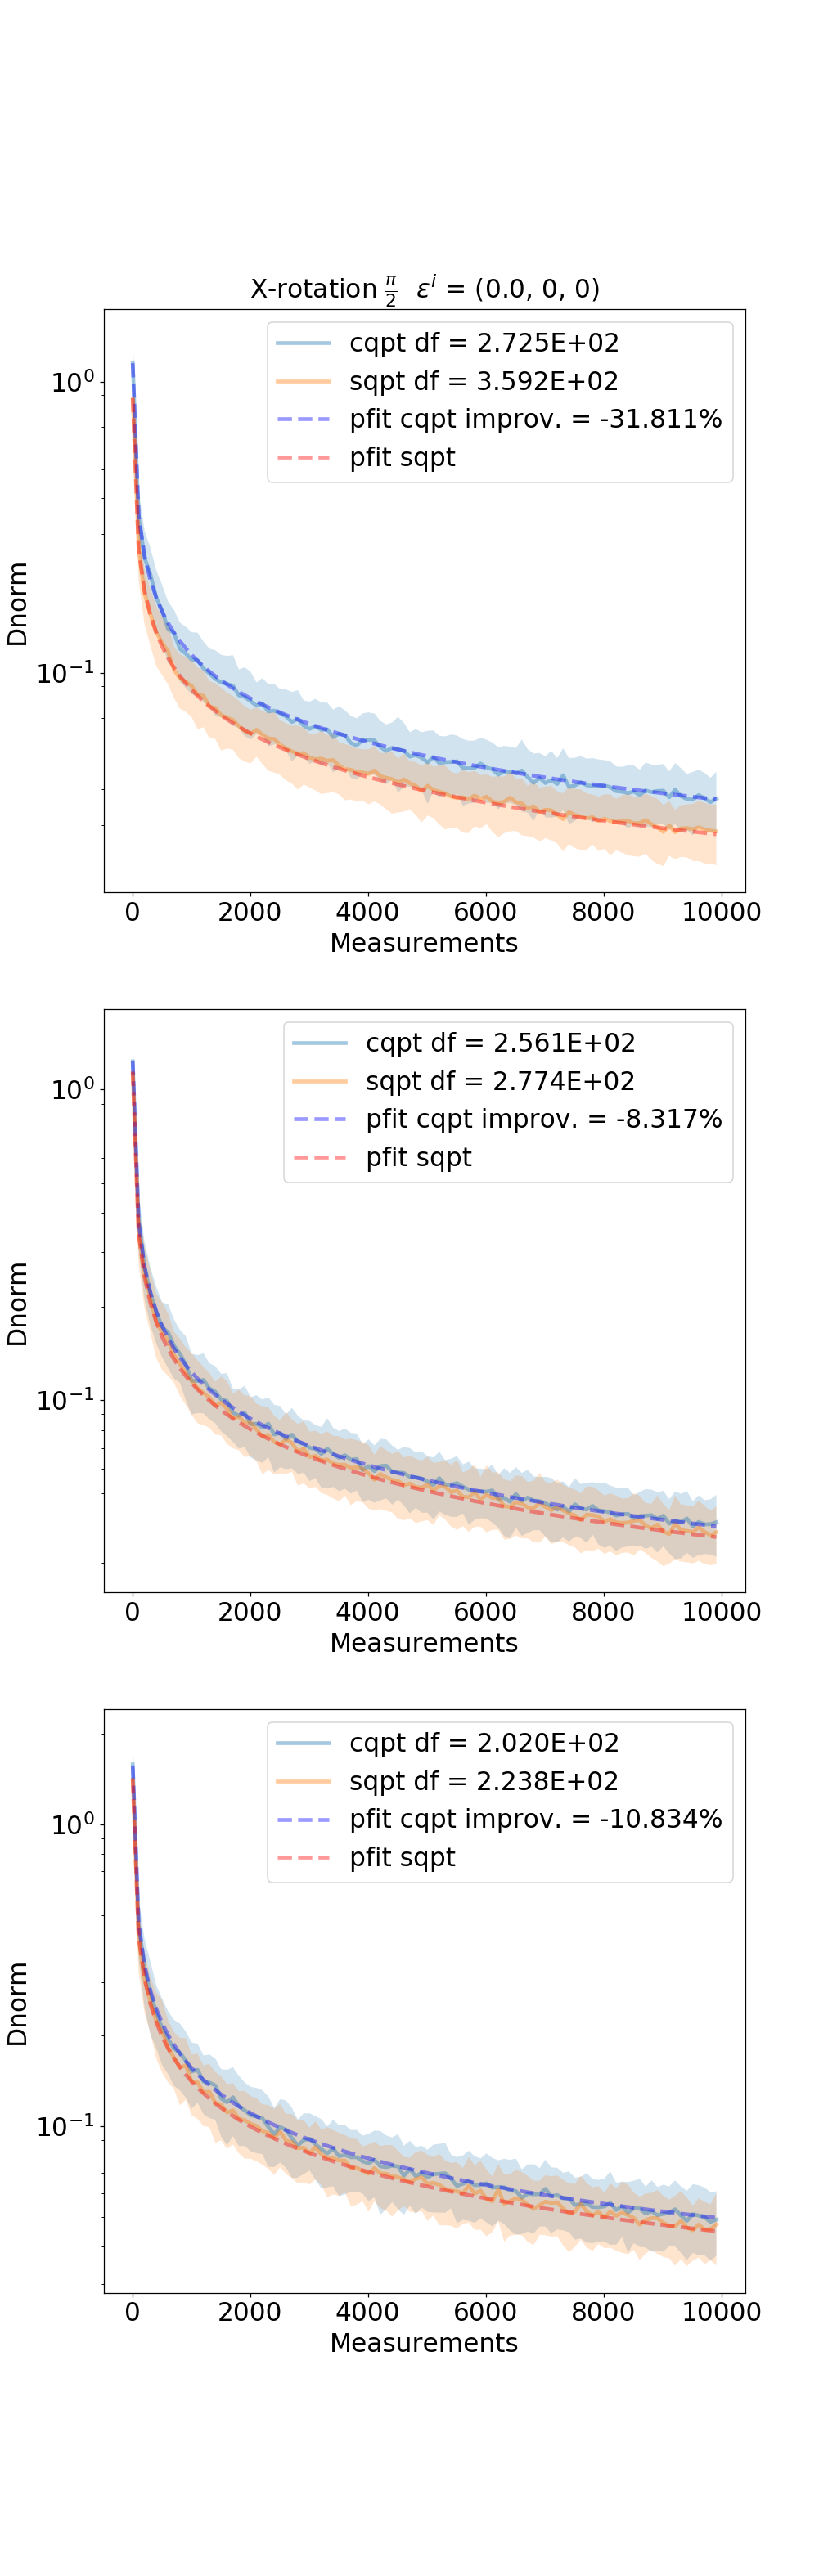

In [337]:
opt_channels = {'rotx900': [86, 89],
 'depol30': [98, 72],
 'depol50': [94, 96]}
improvs = {}
err_bars = {}

opts = []

fig, ax = plt.subplots(nrows=len(opt_channels), ncols=1, figsize=(9, 28))
if len(opt_channels) == 1:
    ax = [ax]
w=1   # smooth out the noise by choosing a moving average window
xcutoff = 9900  # cutoffs for fitting decay curve ansatz
ycutoff = 10
w2=1
w3 = 1
measurements = ma(np.arange(10,10000, 100), w)
measurements2 = ma(np.arange(10,10000, 100), 1)
iterates=100
figi=0
i='rotx9050'
for figi, i in enumerate(list(opt_channels.keys())):
    yi, xi = opt_channels[i]

#    with open("twoaxisrotz/twoaxisrot/yaxis_{}/{}n_{}maxis7.pickle".format(yi, i, xi), "rb") as handle:
#        c1n = pickle.load(handle)

#    with open("tests/sqpt_{}n_maxis.pickle".format(i), "rb") as handle:
#        c2n = pickle.load(handle)
    iterations = iterates
    norm_it = iterations
    c1n, c2n = np.zeros_like(measurements), np.zeros_like(measurements)
    c1n2, c2n2 = np.zeros_like(measurements), np.zeros_like(measurements)

    for iteration in range(1, iterations+1, 1):
        
        try:
            with open("tests/cqpt_{}{}n_it_{}.pickle".format(i, int(noises[figi]*100), iteration), "rb") as handle:
                c1nv = pickle.load(handle)
                c1n += np.array(c1nv)
                c1n2 += np.array(c1nv)*np.array(c1nv) 

            with open("tests/sqpt_{}n_it_{}.pickle".format(i, iteration), "rb") as handle:
                c2nv = pickle.load(handle)
                c2n += np.array(c2nv)
                c2n2 += np.array(c2nv)*np.array(c2nv)
        except FileNotFoundError as e:
            norm_it -= 1
        
            
    c1n /= norm_it
    c2n /= norm_it
    c1n2 /= norm_it
    c2n2 /= norm_it
    
    c1ne = np.sqrt(c1n2 - c1n*c1n)
    c2ne = np.sqrt(c2n2 - c2n*c2n)
    
    
    
    
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    

    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1), maxfev=6000)
    slope1 = popt[0]
    

    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc2n, w2), p0=(1), maxfev=6000)
    slope2 = popt[0]
    
    ax[figi].semilogy(measurements, ma(c1n, w), '-', alpha=0.4, linewidth=3.0, label='cqpt df = {:.3E}'.format(1000/slope1))
    ax[figi].fill_between(ma(measurements, w3), ma(c1n, w3)-ma(c1ne, w3), ma(c1n, w3)+ma(c1ne, w3), alpha=0.2)
    
    ax[figi].semilogy(measurements, ma(c2n, w), '-', alpha=0.4, linewidth=3.0, label='sqpt df = {:.3E}'.format(1000/slope2))    
    ax[figi].fill_between(ma(measurements, w3), ma(c2n, w3)-ma(c2ne, w3), ma(c2n, w3)+ma(c2ne, w3), alpha=0.2)
    
    ax[figi].semilogy(measurements, func(measurements, slope1), 'b--',alpha=0.4, linewidth=3.0, label='pfit cqpt improv. = {}%'.format(round(100*(1/slope1 - 1/slope2)/(1/slope1), 3)))

    ax[figi].semilogy(measurements, func(measurements, slope2), 'r--',alpha=0.4, linewidth=3.0, label='pfit sqpt')
    
    ax[figi].set_xlabel("Measurements", fontsize=10)
    
    ax[figi].tick_params(axis='both', which='major', labelsize=10)
#ax[1].tick_params(axis='both', which='major', labelsize=10)
    ax[figi].set_xlabel("Measurements", fontsize=20)
    ax[figi].set_ylabel("Dnorm", fontsize=20)
    if i[-2:-1].isdigit() == False:
        noise = 0
        cname = i[:-1]
    else:
        noise = int(i[-2:])
        cname = i[:-2]
    if figi == 0:
        cname = r"X-rotation $\frac{\pi}{2}$"
        ax[figi].set_title(r"{}  $\epsilon^i$ = ({}, 0, 0)".format(cname, noise/100.), fontsize=20)
    else:
        cname = ""
    
    
    opts.append(1000/slope2)
    
#ax[1].set_title("Amplitude damping (C4) noise = 0.5", fontsize=10)
#ax[1].set_ylabel("Dnorm", fontsize=10)

    ax[figi].legend(fontsize=20)
    ax[figi].tick_params(axis='both', which='major', labelsize=20)

        
    pfitimprov = 100*(1/slope1 - 1/slope2)/(1/slope1)
    improvs["{}_{}".format(channel,figi)] = pfitimprov
    
    
    mc1ne = ma(c1ne, 1)[np.where(ma(c1ne, 1) < ycutoff)]
    mc1ne = mc1ne[np.where(m < xcutoff)]


    popterr1, pcov2 = curve_fit(func, ma(m, w2), ma(mc1n, w2)-ma(mc1ne, w3), p0=(1), maxfev=6000) 
    popterr2, pcov3 = curve_fit(func, ma(m, w2), ma(mc2n, w2)-ma(mc1ne, w3), p0=(1), maxfev=6000)   # pcovs are useless variables

    aux = 100*abs(1/popterr1[0] - 1/popterr2[0]) / (1/popterr1[0])
    slopeerr = (pfitimprov - aux) / pfitimprov
    
    err_bars["{}_{}".format(channel,figi)] = slopeerr
    if figi == 0:
        extent = ax[figi].get_window_extent().transformed(fig.dpi_scale_trans.inverted())


# Pad the saved area by 10% in the x-direction and 20% in the y-direction
fig.savefig('itavexample.pdf', bbox_inches=extent.expanded(1.33, 1.2), dpi=300)
    


In [138]:
improvs

{'depol_0': -31.81124190651841,
 'depol_1': -10.506547535193269,
 'depol_2': -21.63164659070598,
 'depol_3': -4.633834761496296,
 'depol_4': -1.9252654935055473,
 'depol_5': 0.34292562914160896,
 'depol_6': -6.650458309049557,
 'depol_7': -9.537522062878283,
 'depol_8': -33.70559628253748,
 'depol_9': -7.982202519266427,
 'depol_10': -8.316738202698916,
 'depol_11': -10.833597892657908}

In [177]:
data = np.array([i for i in improvs.values()])

<IPython.core.display.Javascript object>


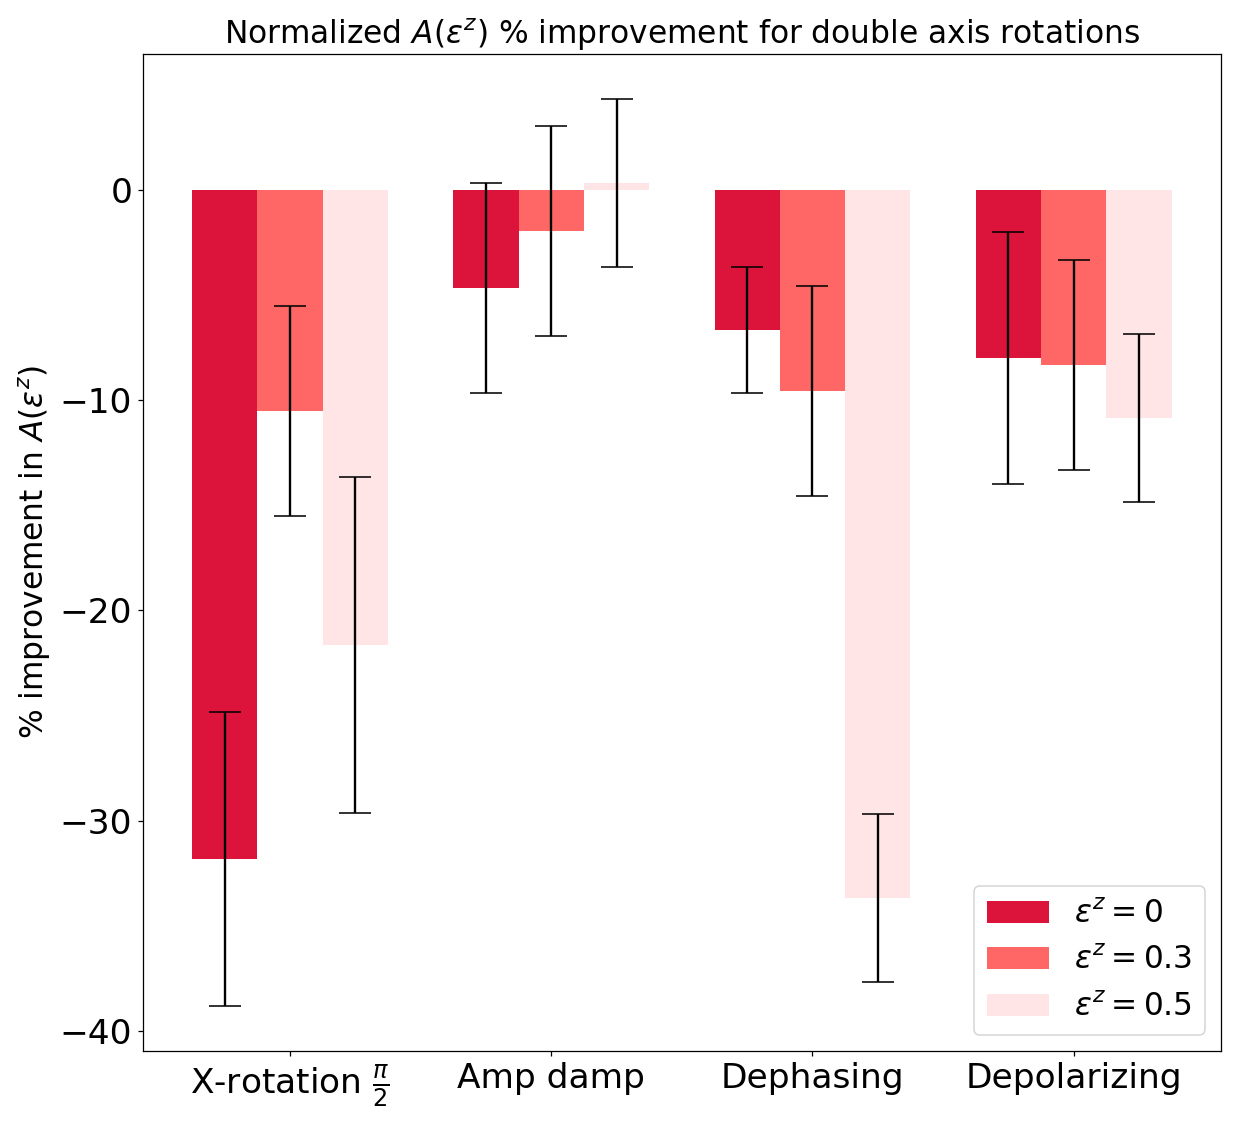

In [317]:
chann = r"$\frac{\pi}{2}$ X-Rotation"
labels = [r"X-rotation $\frac{\pi}{2}$", "Amp damp", "Dephasing", "Depolarizing"]
#labels = labels[:int(len(labels)/2)]
e0 = data[[0,3,6,9]]
e30 = data[[1,4,7,10]]
e50 = data[[2,5,8,11]]

 

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(11,10))
rects1 = ax.bar(x - width, e0, width, label=r'$\epsilon^z=0$', yerr = [7,5,3,6], alpha=1, ecolor='black', capsize=10, color="crimson")
rects2 = ax.bar(x , e30, width, label=r'$\epsilon^z=0.3$', yerr = 5, alpha=0.6, ecolor='black', capsize=10, color="red")
rects2 = ax.bar(x + width, e50, width, label=r'$\epsilon^z=0.5$', yerr = [8,4,4,4], alpha=0.1, ecolor='black', capsize=10, color="red")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'% improvement in $ A(\epsilon ^z)$', fontsize=20)
ax.set_title(r'Normalized $A(\epsilon ^z)$ % improvement for double axis rotations'.format(chann), fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=20)
plt.tick_params(axis='both', which='major', labelsize=22)
ax.legend(fontsize=20)

fig.tight_layout()

plt.show()
plt.savefig("cqpthist.pdf", dpi=300, bbox_inches='tight')

In [23]:
qplists = [[[[theta, phi], [theta2, phi2]] for theta in np.linspace(0, np.pi*0.5, 10) for phi in np.linspace(0, np.pi, 10)] for theta2 in np.linspace(0, np.pi*0.5, 10) for phi2 in np.linspace(0, np.pi, 10) ]

<IPython.core.display.Javascript object>


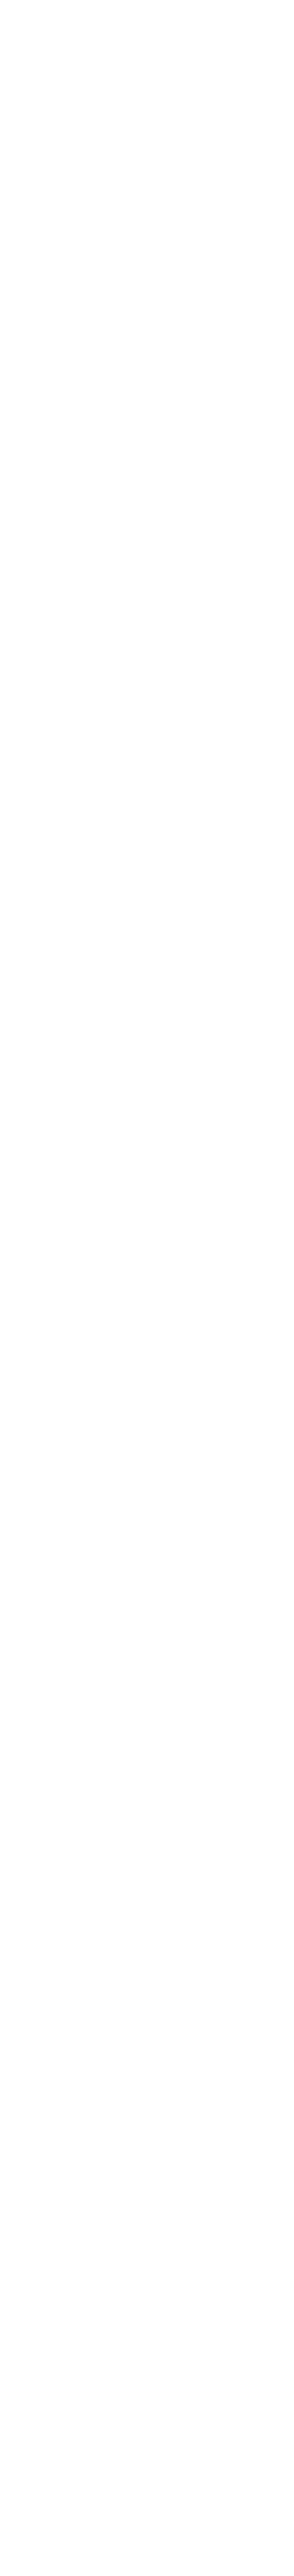

TypeError: func() takes 2 positional arguments but 3 were given

In [225]:
improvs = {}

opts = []
fig, ax = plt.subplots(nrows=len(opt_channels), ncols=1, figsize=(8, 70))
w=1   # smooth out the noise by choosing a moving average window
xcutoff = 9900  # cutoffs for fitting decay curve ansatz
ycutoff = 10
w2=1
w3 = 1
measurements = ma(np.arange(10,10000, 100), w)
measurements2 = ma(np.arange(10,10000, 100), 1)
iterates=10
for figi, i in enumerate(list(opt_channels.keys())):
    yi, xi = opt_channels[i]

#    with open("twoaxisrotz/twoaxisrot/yaxis_{}/{}n_{}maxis7.pickle".format(yi, i, xi), "rb") as handle:
#        c1n = pickle.load(handle)

#    with open("tests/sqpt_{}n_maxis.pickle".format(i), "rb") as handle:
#        c2n = pickle.load(handle)
    iterations = iterates
    norm_it = iterations
    c1n, c2n = np.zeros_like(measurements), np.zeros_like(measurements)
    c1n2, c2n2 = np.zeros_like(measurements), np.zeros_like(measurements)

    for iteration in range(1, iterations+1, 1):
        
        try:
            with open("tests/cqpt_{}{}n_it_{}.pickle".format(i, int(noises[figi]*100), iteration), "rb") as handle:
                c1nv = pickle.load(handle)
                c1n += np.array(c1nv)
                c1n2 += np.array(c1nv)*np.array(c1nv) 

            with open("tests/csqpt_{}{}n_it_{}.pickle".format(i, int(noises[figi]*100), iteration), "rb") as handle:
                c2nv = pickle.load(handle)
                c2n += np.array(c2nv)
                c2n2 += np.array(c2nv)*np.array(c2nv)
        except FileNotFoundError as e:
            norm_it -= 1
        
            
    c1n /= norm_it
    c2n /= norm_it
    c1n2 /= norm_it
    c2n2 /= norm_it
    
    c1ne = np.sqrt(c1n2 - c1n*c1n)
    c2ne = np.sqrt(c2n2 - c2n*c2n)
    
    
    
    
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    

    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    

    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc2n, w2), p0=(1,1), maxfev=6000)
    slope2, a2 = popt[0], popt[1]
    
    ax[figi].semilogy(measurements, ma(c1n, w), '-', alpha=0.4, linewidth=3.0, label='cqpt df = {:.3E}'.format(1000/slope1))
    ax[figi].fill_between(ma(measurements, w3), ma(c1n, w3)-ma(c1ne, w3), ma(c1n, w3)+ma(c1ne, w3), alpha=0.2)
    
    ax[figi].semilogy(measurements, ma(c2n, w), '-', alpha=0.4, linewidth=3.0, label='sqpt df = {:.3E}'.format(1000/slope2))    
    ax[figi].fill_between(ma(measurements, w3), ma(c2n, w3)-ma(c2ne, w3), ma(c2n, w3)+ma(c2ne, w3), alpha=0.2)
    
    ax[figi].semilogy(measurements, func(measurements, slope1, a1), 'b--',alpha=0.4, linewidth=3.0, label='pfit cqpt improv. = {}%'.format(round(100*(1/slope1 - 1/slope2)/(1/slope1), 3)))

    ax[figi].semilogy(measurements, func(measurements, slope2, a2), 'r--',alpha=0.4, linewidth=3.0, label='pfit sqpt')
    
    ax[figi].set_xlabel("Measurements", fontsize=10)
    
    ax[figi].tick_params(axis='both', which='major', labelsize=10)
#ax[1].tick_params(axis='both', which='major', labelsize=10)
    ax[figi].set_xlabel("Measurements", fontsize=10)
    ax[figi].set_ylabel("Dnorm", fontsize=10)
    if i[-2:-1].isdigit() == False:
        noise = 0
        cname = i[:-1]
    else:
        noise = int(i[-2:])
        cname = i[:-2]
    ax[figi].set_title(r"{}  $\epsilon$ = {}".format(cname, noise/100.), fontsize=10)
    
    opts.append(1000/slope2)
    
#ax[1].set_title("Amplitude damping (C4) noise = 0.5", fontsize=10)
#ax[1].set_ylabel("Dnorm", fontsize=10)

    ax[figi].legend(fontsize=10)
    pfitimprov = 100*(1/slope1 - 1/slope2)/(1/slope1)
    improvs["{}_{}".format(channel,figi)] = pfitimprov
#ax[1].legend(fontsize=10)
plt.savefig("doom2.png")

array([-28.5882785 ,  -5.29267348,  -1.54718685,  -4.46978474])

<IPython.core.display.Javascript object>


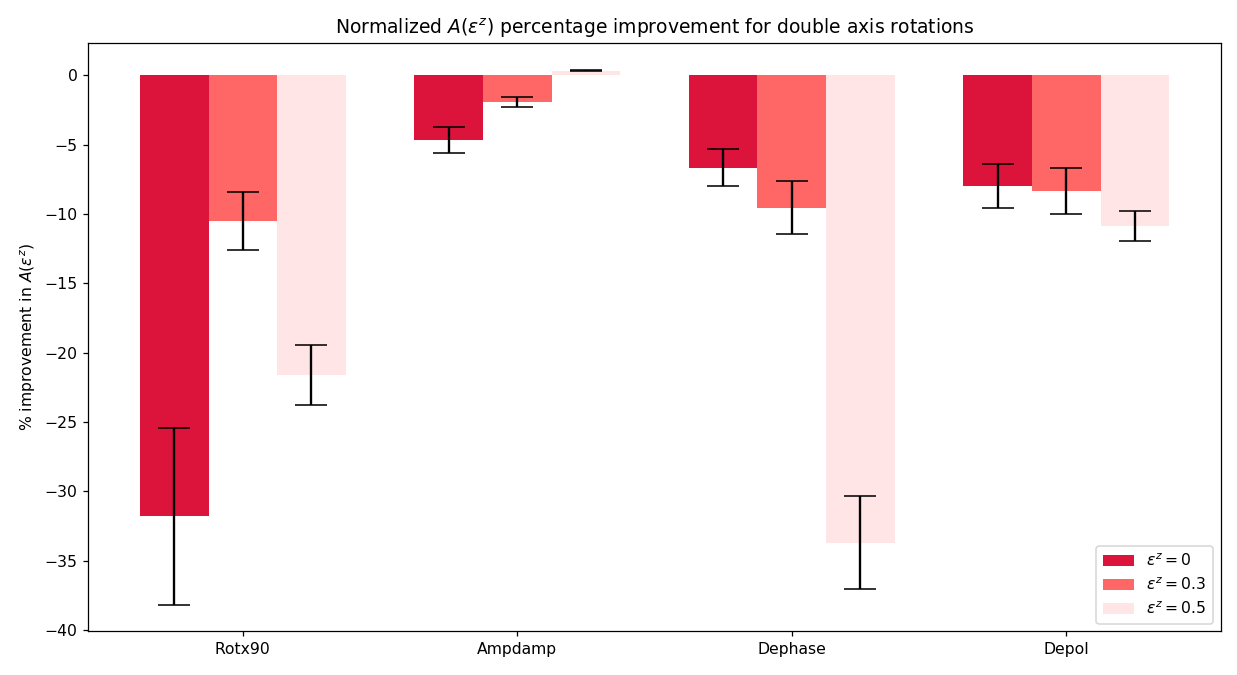

In [226]:
#data = np.array([i for i in improvs.values()])
#labels = range(len(data))
#fig, ax = plt.subplots()
#ax.bar(labels, data, yerr=data*0.2, capsize=5)


chann = r"$\frac{\pi}{2}$ X-Rotation"
labels = ["Rotx90", "Ampdamp", "Dephase", "Depol"]
#labels = labels[:int(len(labels)/2)]
e0 = data[[0,3,6,9]]
e30 = data[[1,4,7,10]]
e50 = data[[2,5,8,11]]

 

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(11,6))
rects1 = ax.bar(x - width, e0, width, label=r'$\epsilon^z=0$', yerr = e0*0.2, alpha=1, ecolor='black', capsize=10, color="crimson")
rects2 = ax.bar(x , e30, width, label=r'$\epsilon^z=0.3$', yerr = e30*0.2, alpha=0.6, ecolor='black', capsize=10, color="red")
rects2 = ax.bar(x + width, e50, width, label=r'$\epsilon^z=0.5$', yerr = e50*0.1, alpha=0.1, ecolor='black', capsize=10, color="red")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'% improvement in $ A(\epsilon ^z)$')
ax.set_title(r'Normalized $A(\epsilon ^z)$ percentage improvement for double axis rotations'.format(chann))
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


In [27]:
list(opt_channels.keys())

['rotx900',
 'rotx9030',
 'rotx9050',
 'ampdamp0',
 'ampdamp30',
 'ampdamp50',
 'dephase0',
 'dephase30',
 'dephase50',
 'depol0',
 'depol30',
 'depol50']

<IPython.core.display.Javascript object>


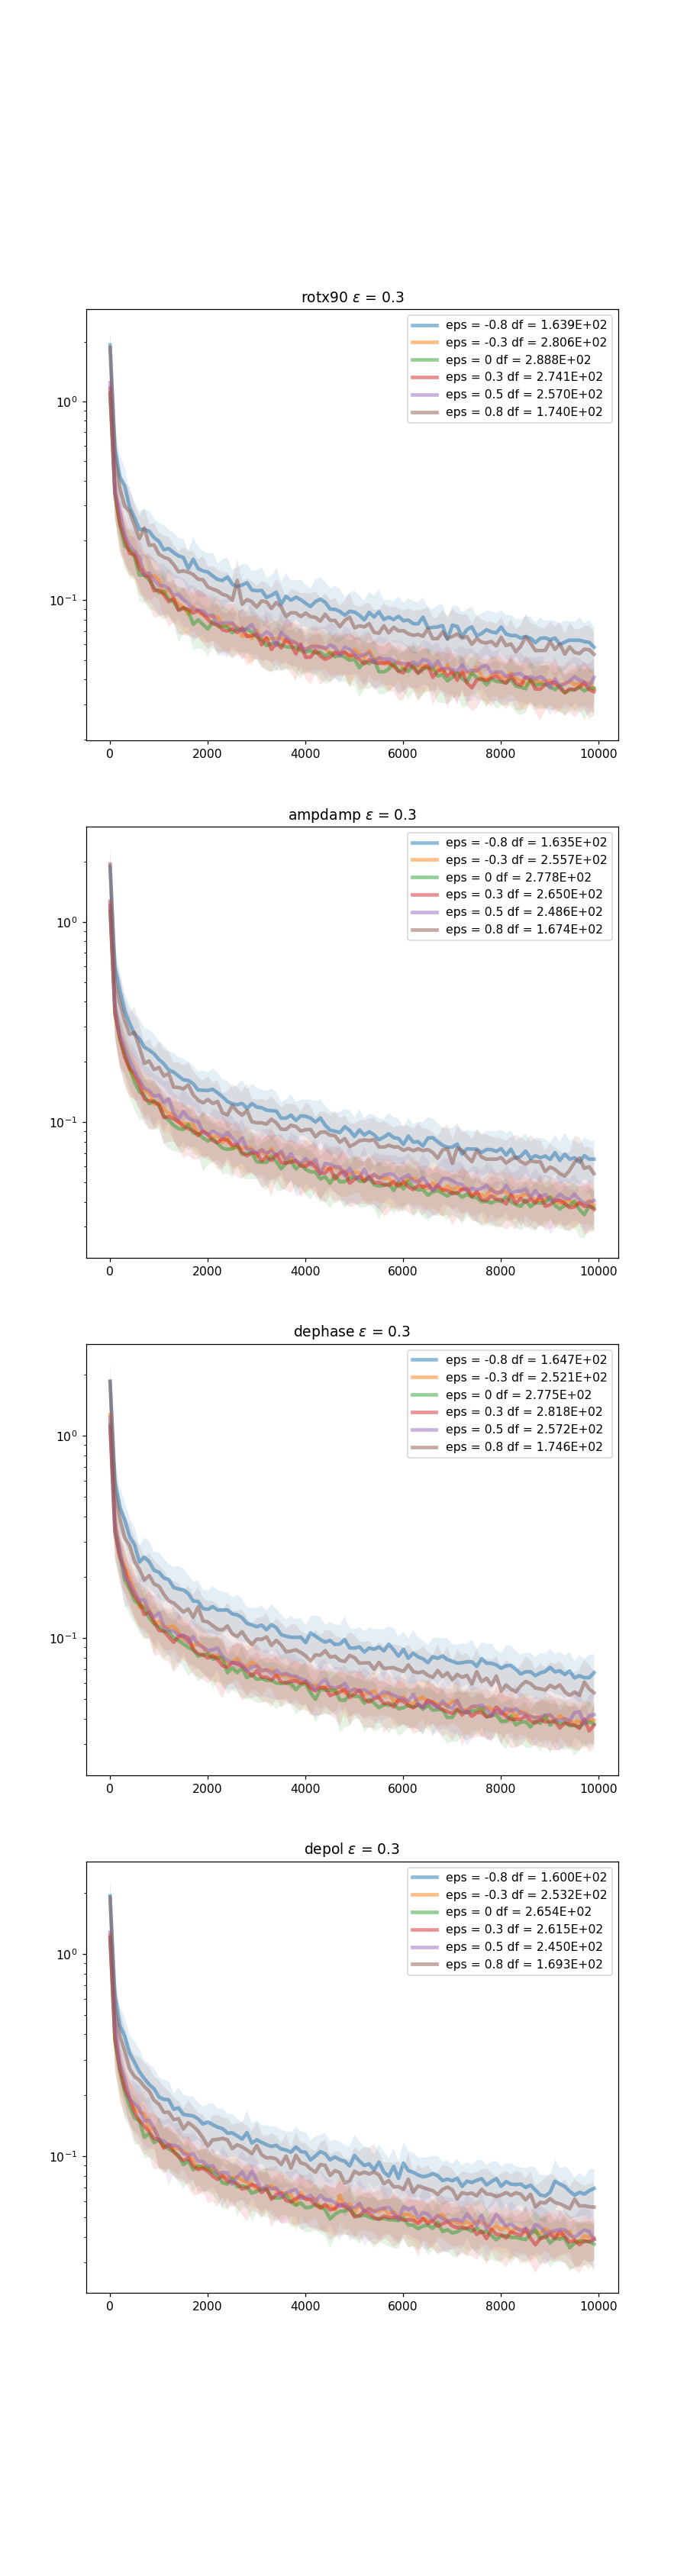

In [29]:
noise = 0.3
measurements = ma(np.arange(10, 10000,100),1)
epss = [-0.8,-0.3, 0, 0.3, 0.5, 0.8]
fig, ax = plt.subplots(nrows=len(channels), ncols=1, figsize=(8, 30))
iterations=50
for chan, channel in enumerate(channels):
    epsavs = []
    epssqs = [] 
    
    for eps in epss:
        av = np.zeros_like(measurements)
        stds = np.zeros_like(measurements)
        for iteration in range(1, iterations+1, 1):
            with open("znoiseopt/sqpt_{}{}n_it_{}_e{}.pickle".format(channel, int(noise*100), iteration, int(eps*100)), "rb") as handle:
                dfs = pickle.load(handle)
            av += np.array(dfs)
            stds += np.array(dfs)*np.array(dfs)
        av /= iterations
        stds /= iterations
        epsavs.append(av)
        epssqs.append(stds)

    xcutoff = 9900  # cutoffs for fitting decay curve ansatz
    ycutoff = 10
    w2=1
    w3 = 1
    measurements = ma(np.arange(10,10000, 100), 1)
    measurements2 = ma(np.arange(10,10000, 100), 1)
    epsavs, epssqs = np.array(epsavs), np.array(epssqs)

    errs = np.sqrt(epssqs - epsavs*epsavs)

    for figi, eps in enumerate(epss):
        c1n = epsavs[figi] # index eps vals averaged
        c1ne = errs[figi]
        mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
        mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]


        popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1,1), maxfev=6000)
        slope1, a1 = popt[0], popt[1]

        ax[chan].semilogy(measurements, ma(c1n, w), '-', alpha=0.5, linewidth=3.0, label='eps = {} df = {:.3E}'.format(eps, 1000/slope1))
        ax[chan].fill_between(ma(measurements, w3), ma(c1n, w3)-ma(c1ne, w3), ma(c1n, w3)+ma(c1ne, w3), alpha=0.12)
        #ax.semilogy(measurements, func(measurements, slope1, a1), 'r--',alpha=0.4, linewidth=3.0, label='pfit sqpt')
        ax[chan].legend(fontsize=10)
        ax[chan].set_title(r"{} $\epsilon$ = {}".format(channel, noise))



<IPython.core.display.Javascript object>


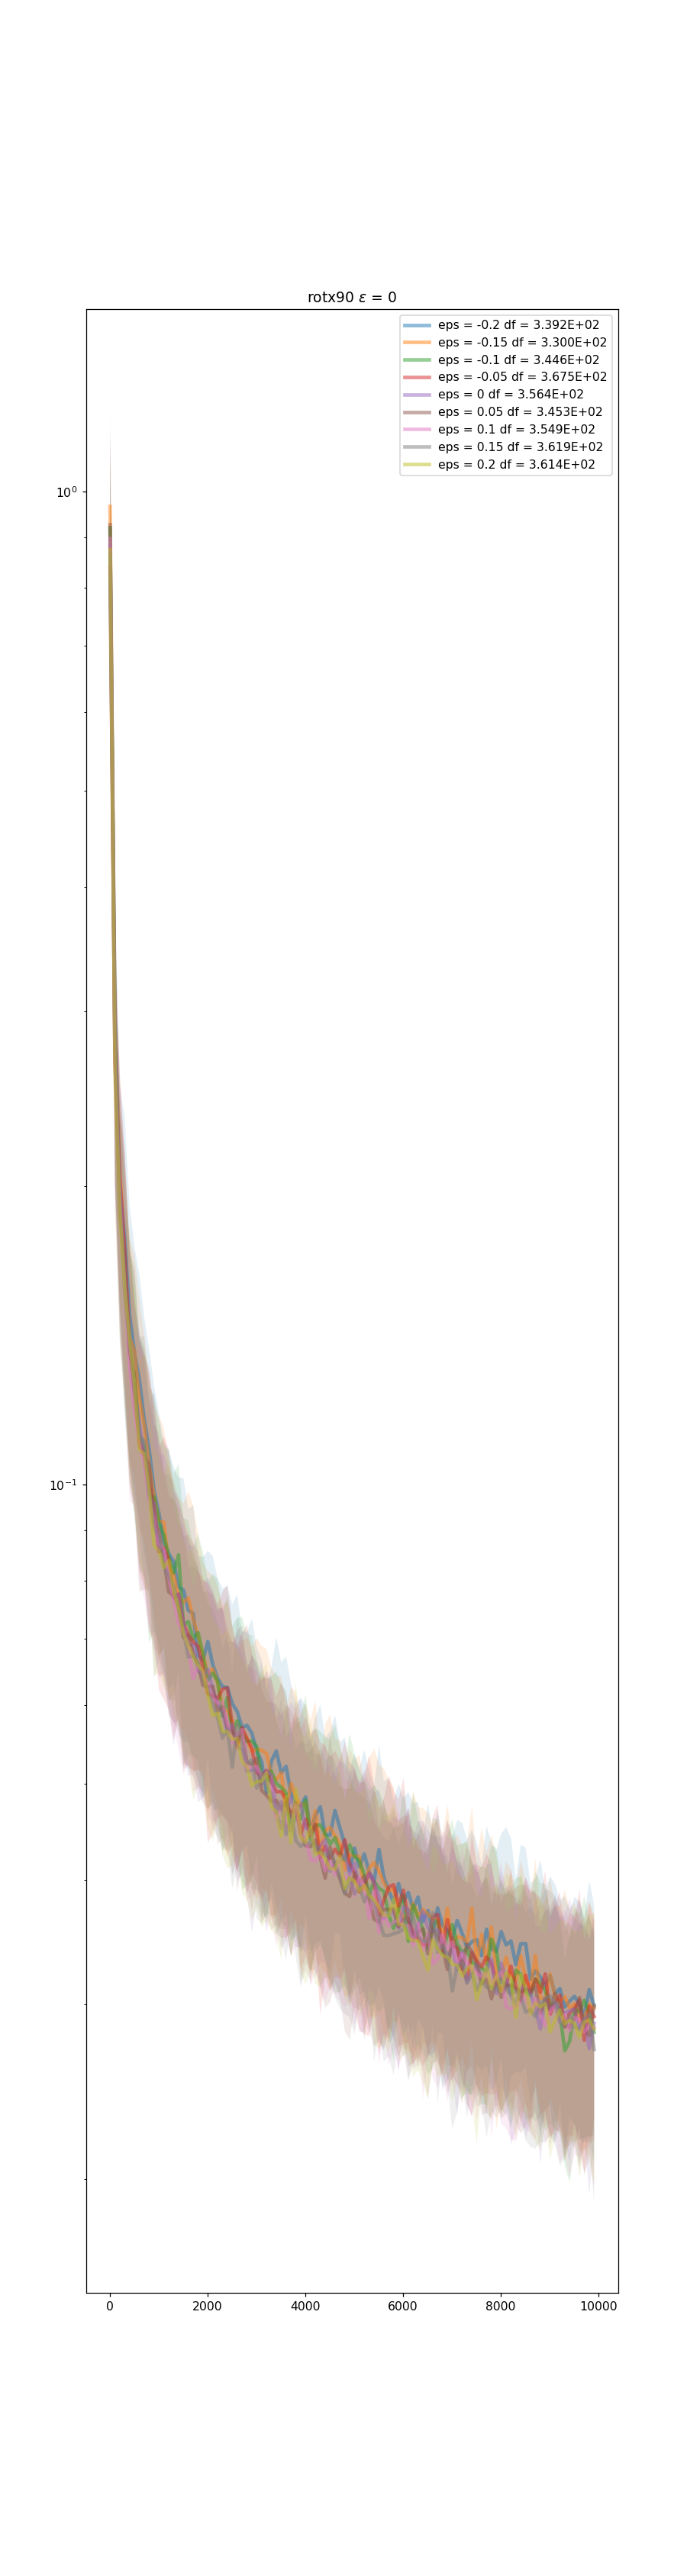

<IPython.core.display.Javascript object>


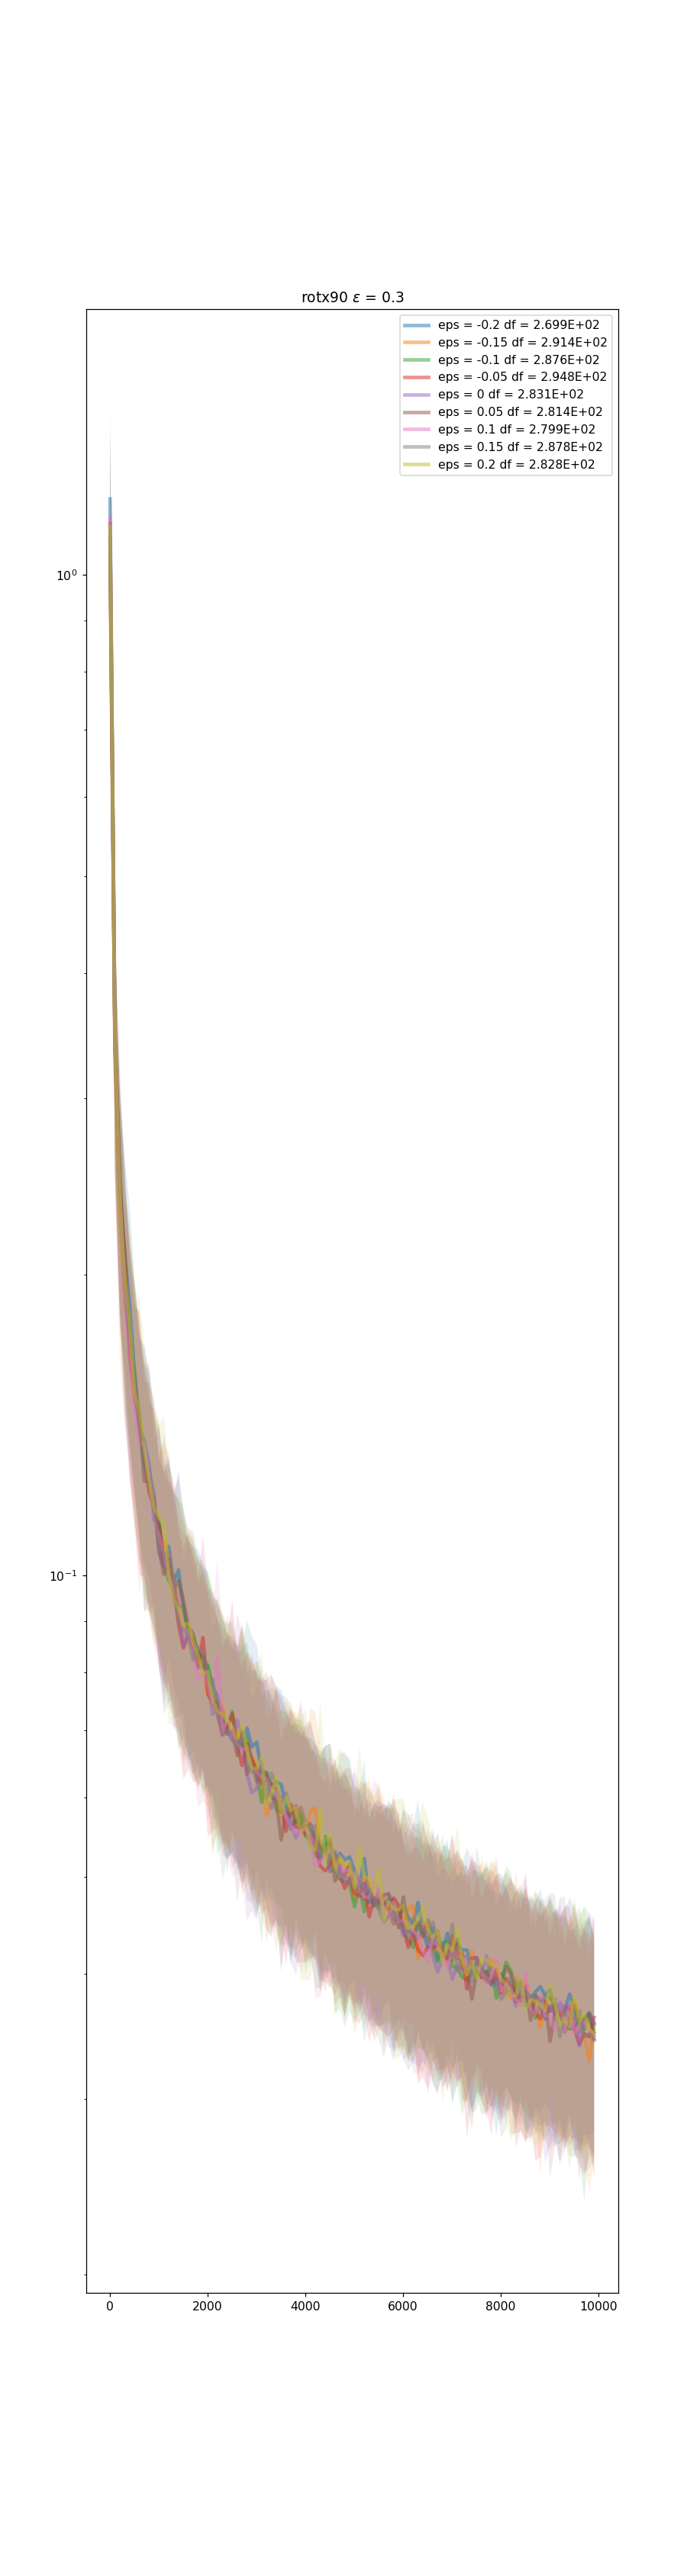

In [427]:
channels = [
 'rotx90',
 ]
eps_dfs = {}
err_bars = {}
for noise in [0, 0.3]:
    #noise = 0.3
    measurements = ma(np.arange(10, 10000,100),1)
    epss = [-0.2,-0.15,-0.1,-0.05,0, 0.05, 0.1, 0.15,0.2]

    fig, ax = plt.subplots(nrows=len(channels), ncols=1, figsize=(8, 30))

    if len(channels)==1:
        ax = [ax]

    iterations=100
    w=1

    def func(x, b):
        return b*x**(-0.5)
    for chan, channel in enumerate(channels):
        epsavs = []
        epssqs = [] 

        for eps in epss:
            av = np.zeros_like(measurements)
            stds = np.zeros_like(measurements)
            for iteration in range(1, iterations+1, 1):
                with open("znoiseopt/sqpt_{}{}n_it_{}_z{}.pickle".format(channel, int(noise*100), iteration, int(eps*100)), "rb") as handle:
                    dfs = pickle.load(handle)
                av += np.array(dfs)
                stds += np.array(dfs)*np.array(dfs)
            av /= iterations
            stds /= iterations
            epsavs.append(av)
            epssqs.append(stds)

        xcutoff = 9900  # cutoffs for fitting decay curve ansatz
        ycutoff = 10
        w2=1
        w3 = 1
        measurements = ma(np.arange(10,10000, 100), 1)
        measurements2 = ma(np.arange(10,10000, 100), 1)
        epsavs, epssqs = np.array(epsavs), np.array(epssqs)

        errs = np.sqrt(epssqs - epsavs*epsavs)

        for figi, eps in enumerate(epss):
            c1n = epsavs[figi] # index eps vals averaged
            c1ne = errs[figi]
            mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
            mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]


            popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1), maxfev=6000)
            slope1 = popt[0]

            ax[chan].semilogy(measurements, ma(c1n, w), '-', alpha=0.5, linewidth=3.0, label='eps = {} df = {:.3E}'.format(eps, 1000/slope1))
            ax[chan].fill_between(ma(measurements, w3), ma(c1n, w3)-ma(c1ne, w3), ma(c1n, w3)+ma(c1ne, w3), alpha=0.12)
            #ax.semilogy(measurements, func(measurements, slope1, a1), 'r--',alpha=0.4, linewidth=3.0, label='pfit sqpt')
            ax[chan].legend(fontsize=10)
            ax[chan].set_title(r"{} $\epsilon$ = {}".format(channel, noise))


            eps_dfs["{}_{}_noise={}_axis=z-axis".format(channel, eps, int(noise*100))] = 1000 / slope1

            mc1ne = ma(c1ne, 1)[np.where(ma(c1ne, 1) < ycutoff)]
            mc1ne = mc1ne[np.where(m < xcutoff)]


            popterr1, pcov2 = curve_fit(func, ma(m, w2), ma(mc1n, w2)-ma(mc1ne, w3), p0=(1), maxfev=6000) 
            popterr2, pcov3 = curve_fit(func, ma(m, w2), ma(mc1n, w2)+ma(mc1ne, w3), p0=(1), maxfev=6000)   # pcovs are useless variables

            slopeerr = abs(popterr1[0] - slope1) / slope1
            err_bars["{}_{}_noise={}_axis=z-axis".format(channel,eps, int(noise*100))] = slopeerr





In [428]:
eps_dfs

{'rotx90_-0.2_noise=0_axis=z-axis': 339.16546323479326,
 'rotx90_-0.15_noise=0_axis=z-axis': 329.96402710979964,
 'rotx90_-0.1_noise=0_axis=z-axis': 344.59485809468976,
 'rotx90_-0.05_noise=0_axis=z-axis': 367.45832859228,
 'rotx90_0_noise=0_axis=z-axis': 356.37682346863124,
 'rotx90_0.05_noise=0_axis=z-axis': 345.30425155835627,
 'rotx90_0.1_noise=0_axis=z-axis': 354.8515586517557,
 'rotx90_0.15_noise=0_axis=z-axis': 361.8924595808108,
 'rotx90_0.2_noise=0_axis=z-axis': 361.3798918294242,
 'rotx90_-0.2_noise=30_axis=z-axis': 269.9051515159941,
 'rotx90_-0.15_noise=30_axis=z-axis': 291.3858690830228,
 'rotx90_-0.1_noise=30_axis=z-axis': 287.6208012183372,
 'rotx90_-0.05_noise=30_axis=z-axis': 294.756874985638,
 'rotx90_0_noise=30_axis=z-axis': 283.0693387879926,
 'rotx90_0.05_noise=30_axis=z-axis': 281.38081896366083,
 'rotx90_0.1_noise=30_axis=z-axis': 279.86941788534756,
 'rotx90_0.15_noise=30_axis=z-axis': 287.793521666997,
 'rotx90_0.2_noise=30_axis=z-axis': 282.75975376738774}

In [429]:
err_bars

{'rotx90_-0.2_noise=0_axis=z-axis': 0.267512111126044,
 'rotx90_-0.15_noise=0_axis=z-axis': 0.27422397850258795,
 'rotx90_-0.1_noise=0_axis=z-axis': 0.24294460783928346,
 'rotx90_-0.05_noise=0_axis=z-axis': 0.25567735042958833,
 'rotx90_0_noise=0_axis=z-axis': 0.274465471661574,
 'rotx90_0.05_noise=0_axis=z-axis': 0.25021559414746614,
 'rotx90_0.1_noise=0_axis=z-axis': 0.26972840430030626,
 'rotx90_0.15_noise=0_axis=z-axis': 0.24993223051265437,
 'rotx90_0.2_noise=0_axis=z-axis': 0.23563491792110225,
 'rotx90_-0.2_noise=30_axis=z-axis': 0.2518234684421999,
 'rotx90_-0.15_noise=30_axis=z-axis': 0.25051717528727596,
 'rotx90_-0.1_noise=30_axis=z-axis': 0.21658202568367363,
 'rotx90_-0.05_noise=30_axis=z-axis': 0.2215323837531653,
 'rotx90_0_noise=30_axis=z-axis': 0.21229917340940813,
 'rotx90_0.05_noise=30_axis=z-axis': 0.24066512804975462,
 'rotx90_0.1_noise=30_axis=z-axis': 0.24644330825973518,
 'rotx90_0.15_noise=30_axis=z-axis': 0.25364627046877397,
 'rotx90_0.2_noise=30_axis=z-axis'

In [430]:
cons[9*0:9*(0+1)]

array([339.16546323, 329.96402711, 344.59485809, 367.45832859,
       356.37682347, 345.30425156, 354.85155865, 361.89245958,
       361.37989183])

In [431]:
cons = np.array([i for i in eps_dfs.values()])
error = np.array([i for i in err_bars.values()]) * cons * 0.25  # as percentage err

<IPython.core.display.Javascript object>


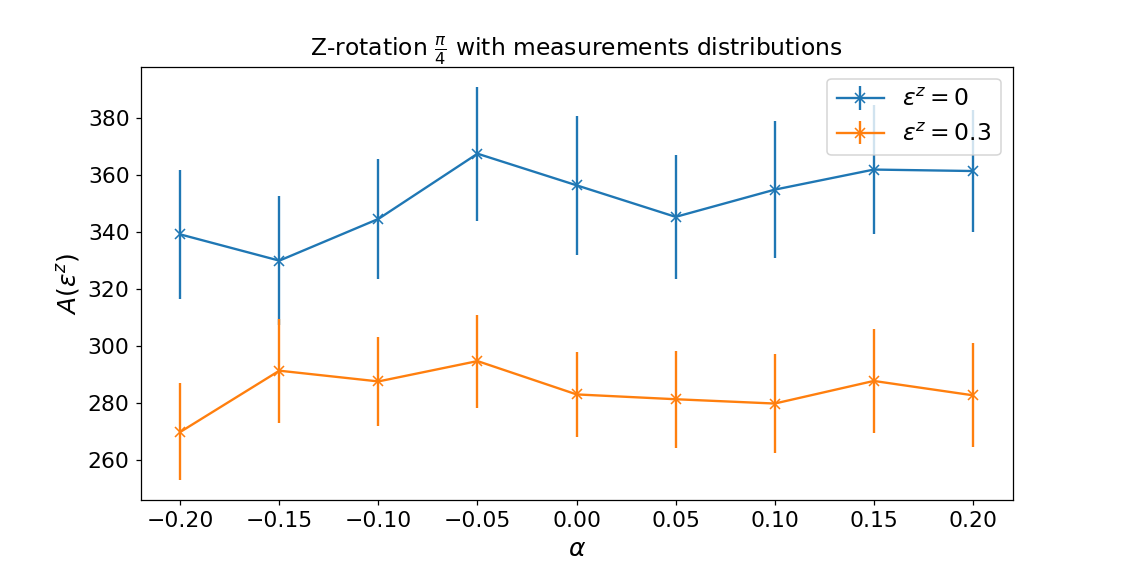

In [441]:

labels = epss
fig, ax = plt.subplots(figsize=(10,5))
for i in [0,1]:
    ax.errorbar(labels, cons[9*i:9*(i+1)], yerr=error[9*i:9*(i+1)], fmt='x-', label=r"$\epsilon^z = {}$".format([0, 0.3][i]))
ax.set_title(r"Z-rotation $ \frac{\pi}{4}$ with measurements distributions", fontsize=15)
ax.set_ylabel(r"$A(\epsilon^z)$", fontsize=16)
ax.set_xlabel(r"$\alpha$", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

ax.legend(fontsize=15)
plt.savefig("zrotnoisedist.pdf", dpi=1000, bbox_inches='tight')

In [363]:
channels = {"ampdamp":damp, "depol":dep(0.2), "dephase":dephase, "rotx90":x_rotation, "roty90":y_rotation, "rotz90":z_rotation}
zzxy = [[np.pi, 0], [0, 0], [np.pi*0.5, 0], [np.pi*0.5, np.pi*0.5]]
xxyz = [[np.pi*0.5, np.pi], [0, 0], [np.pi*0.5, 0], [np.pi*0.5, np.pi*0.5]]

yyxz = [[np.pi*0.5, np.pi*1.5], [0, 0], [np.pi*0.5, 0], [np.pi*0.5, np.pi*0.5]]

zzxyrot18x = [[np.pi-0.1*np.pi, 0], [0+0.1*np.pi, np.pi], [np.pi*0.5-np.pi*0.1, 0], [np.pi*0.5, np.pi*0.5]]
nonorth = [[np.pi-np.pi*0.15, 0], [0+0.15*np.pi, np.pi], [np.pi*0.5, 0], [np.pi*0.5, np.pi*0.5]]

bipyramedal = [[0,0], [np.pi, 0], [np.pi*0.5, np.pi], [np.pi*0.5, np.pi*0.5], [np.pi*0.5, 0]]

octahedral = [[0,0], [np.pi, 0], [np.pi*0.5, np.pi], [np.pi*0.5, np.pi*0.5], [np.pi*0.5, 0], [np.pi*0.5, np.pi*1.5]]

tets = [[np.arcsin(np.sqrt(2/3)), np.pi*0.25], [np.arcsin(np.sqrt(2/3)), np.pi+np.pi*0.25], 
         [np.pi-np.arcsin(np.sqrt(2/3)), np.pi-np.pi*0.25], 
         [np.pi-np.arcsin(np.sqrt(2/3)), 2*np.pi-np.pi*0.25] ]


configs = {"tets":tets, "octahedral2":octahedral, "bipyramedal2":bipyramedal, "zzxy2":zzxy, "xxyz": xxyz, "yyxz": yyxz, "zzxyrot18x":zzxyrot18x, "nonorth":nonorth,
           }


<IPython.core.display.Javascript object>


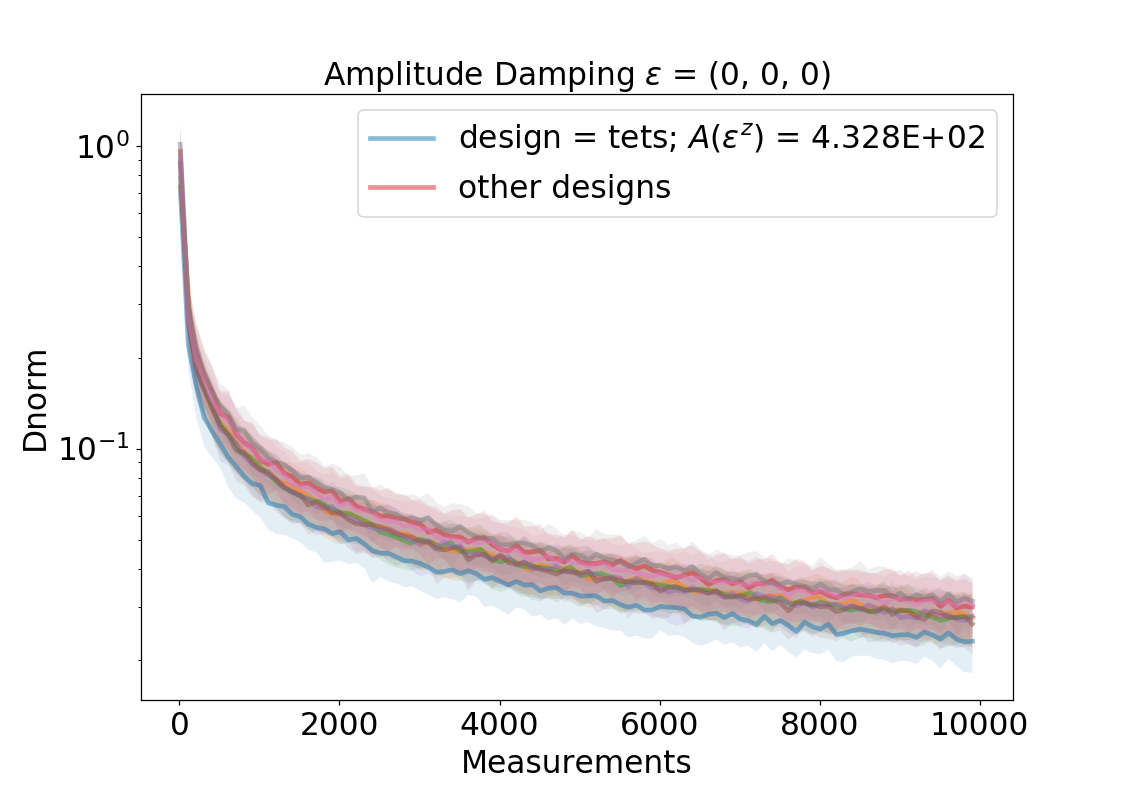

True


In [402]:
channels2 = {"ampdamp":damp}


config_dfs = {}
err_bars = {}

for noise in [0]:
    #noise = 0.0
    #measurements = ma(np.arange(10, 10000,100),1)
    #epss = [-0.15,0, 0.15]
    fig, ax = plt.subplots(nrows=len(channels), ncols=1, figsize=(10, 7))
    if len(channels) == 1:
          ax = [ax]
    iteratiions=100
    w=1
    axis=''
    if noise == 0.3:
        axis = 'z'


    def func(x, b):
        return b*x**(-0.5)

    for chan, channel in enumerate(channels2):
        epsavs = []
        epssqs = []
        for figi, config in enumerate(configs):
            m = int(40000 / len(configs[config]))
            if config == "octahedral2":
                measurements = ma(np.arange(10,m, 100), 1)*6/4
            elif config == "bipyramedal2":
                measurements = ma(np.arange(10,m, 100), 1)*5/4
            else:
                measurements = ma(np.arange(10,m, 100), 1)

            av = np.zeros_like(measurements)
            sqs = np.zeros_like(measurements)
            iterations = iteratiions
            for iteration in range(1, iterations+1, 1):
                with open("cob/{}_{}{}n_it_{}{}".format(config, channel, int(noise*100), iteration, axis), "rb") as handle:
                    dfs = pickle.load(handle)
                if len(dfs) != len(measurements):
                    iterations -= 1
                else:
                    av += np.array(dfs)
                    sqs += np.array(dfs)*np.array(dfs)

            av /= iterations
            sqs /= iterations
            epsavs.append(av)
            epssqs.append(sqs)
            
#            print(iterations)


        xcutoff = 9910  # cutoffs for fitting decay curve ansatz
        ycutoff = 3
        w2=1
        w3 = 1
        if len(epssqs) != len(epsavs):
            raise Exception("Hey, the iteration av lists aren't equal lengthwise")
        for element in range(len(epssqs)):
            epssqs[element] = np.sqrt(epssqs[element] - epsavs[element]*epsavs[element])
            

        errs = epssqs

#        print(measurements, np.sqrt(errs))


        for figi, config in enumerate(configs):

            const = int(40000 / len(configs[config]))
            if config == "octahedral2":
                measurements = ma(np.arange(10,const, 100), 1)*6/4
                print(True)
            elif config == "bipyramedal2":
                measurements = ma(np.arange(10,const, 100), 1)*5/4
            else:
                measurements = ma(np.arange(10,const, 100), 1)
                
            c1n = epsavs[figi] # index eps vals averaged
            c1ne = errs[figi]
            mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements[np.where(ma(c1n, 1) < ycutoff)]
            mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]

            mc1ne = ma(c1ne, 1)[np.where(ma(c1ne, 1) < ycutoff)]
            mc1ne = mc1ne[np.where(m < xcutoff)]


            popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1), maxfev=6000)

            #print(pcov[0][0] / popt, popt)
            slope1 = popt[0]


            if config == "tets":
                dfac = "$A(\epsilon^z)$"
                ax[chan].semilogy(measurements, ma(c1n, w), '-', alpha=0.5, linewidth=3.0, label=r'design = {}; {} = {:.3E}'.format(config, dfac, 1000/slope1))
            elif config == "zzxy2":
                ax[chan].semilogy(measurements, ma(c1n, w), '-', alpha=0.5, linewidth=3.0, label='other designs')
            else:
                ax[chan].semilogy(measurements, ma(c1n, w), '-', alpha=0.5, linewidth=3.0)
            ax[chan].fill_between(ma(measurements, w3), ma(c1n, w3)-ma(c1ne, w3), ma(c1n, w3)+ma(c1ne, w3), alpha=0.12)
            #ax.semilogy(measurements, func(measurements, slope1, a1), 'r--',alpha=0.4, linewidth=3.0, label='pfit sqpt')
            ax[chan].legend(fontsize=20)
            channel = "Amplitude Damping"
            ax[chan].set_title(r"{} $\epsilon$ = ({}, 0, 0)".format(channel, noise), fontsize=20)

            config_dfs["{}_{}_noise={}_axis=z-axis".format(channel, config, int(noise*100))] = 1000 / slope1

            
            
            popterr1, pcov2 = curve_fit(func, ma(m, w2), ma(mc1n, w2)-ma(mc1ne, w3), p0=(1), maxfev=6000) 
            popterr2, pcov3 = curve_fit(func, ma(m, w2), ma(mc1n, w2)+ma(mc1ne, w3), p0=(1), maxfev=6000)   # pcovs are useless variables

            slopeerr = abs(popterr1[0] - slope1) / slope1
            err_bars["{}_{}_noise={}_axis=z-axis".format(channel,config, int(noise*100))] = slopeerr
            #print(slope1, slopeerr)

            ax[chan].set_xlabel("Measurements", fontsize=20)
            ax[chan].set_ylabel("Dnorm", fontsize=20)
            ax[chan].legend(fontsize=20)
            ax[chan].tick_params(axis='both', which='major', labelsize=20)

fig.savefig('cobtets.pdf', bbox_inches='tight', dpi=1000)
       

<IPython.core.display.Javascript object>


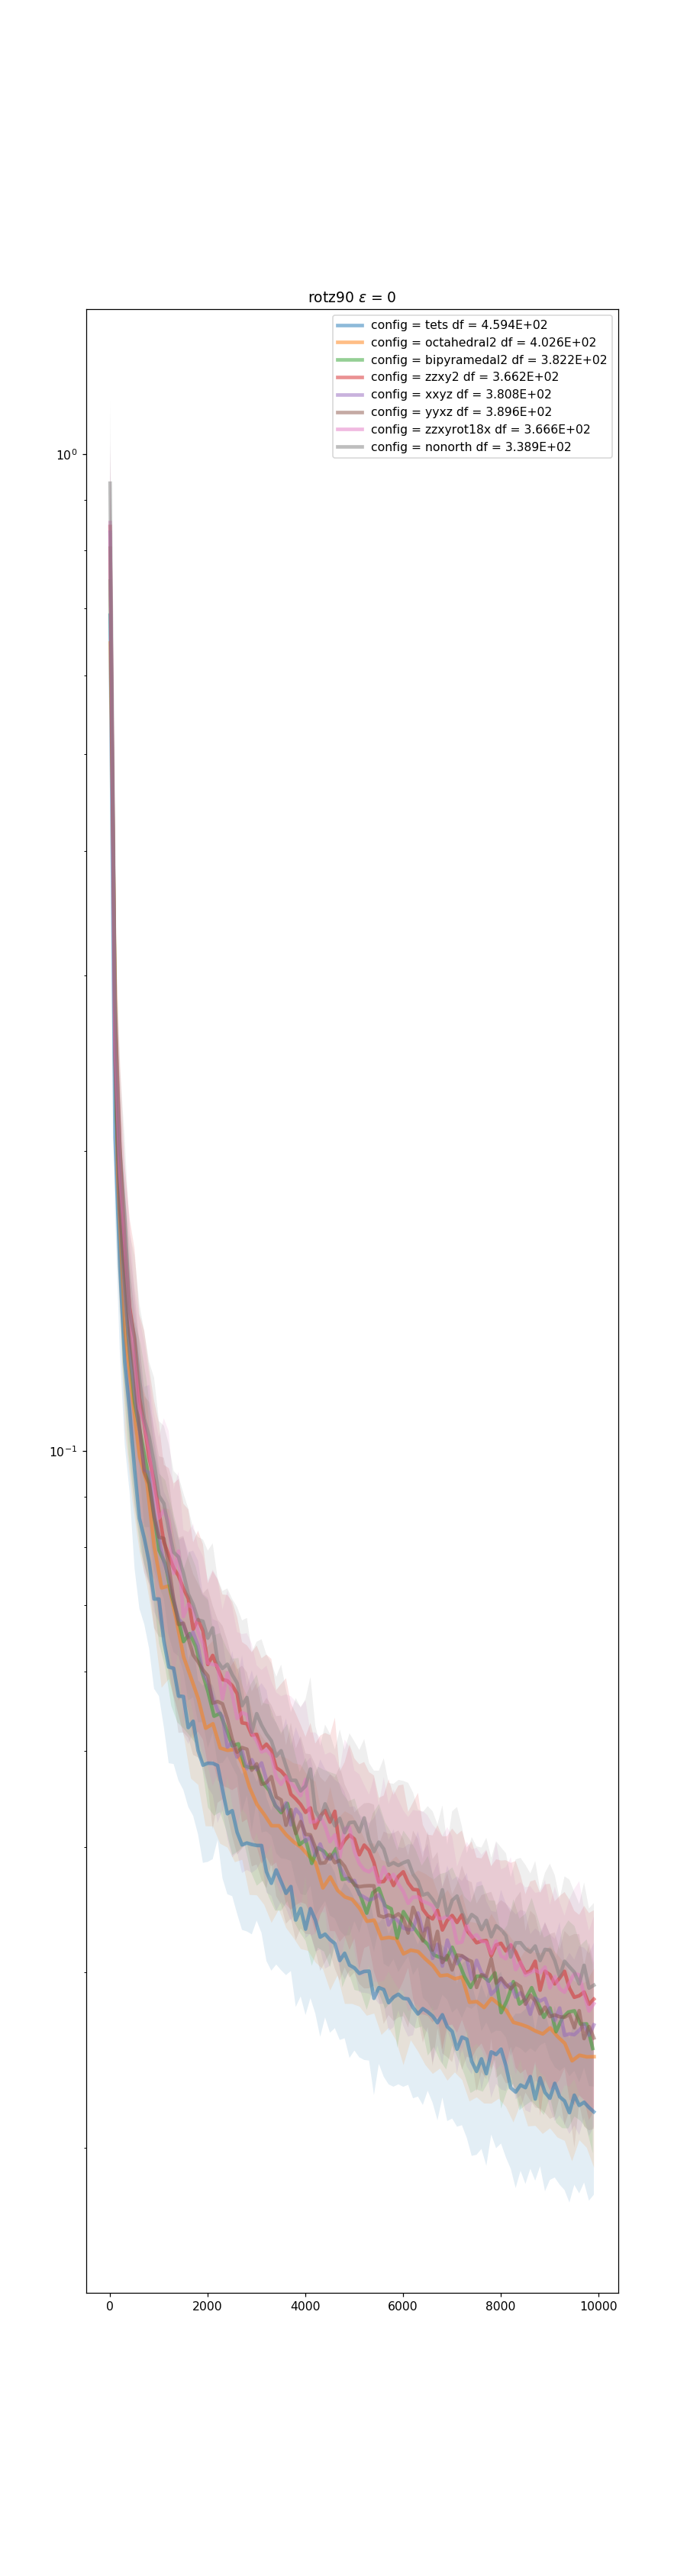

True


<IPython.core.display.Javascript object>


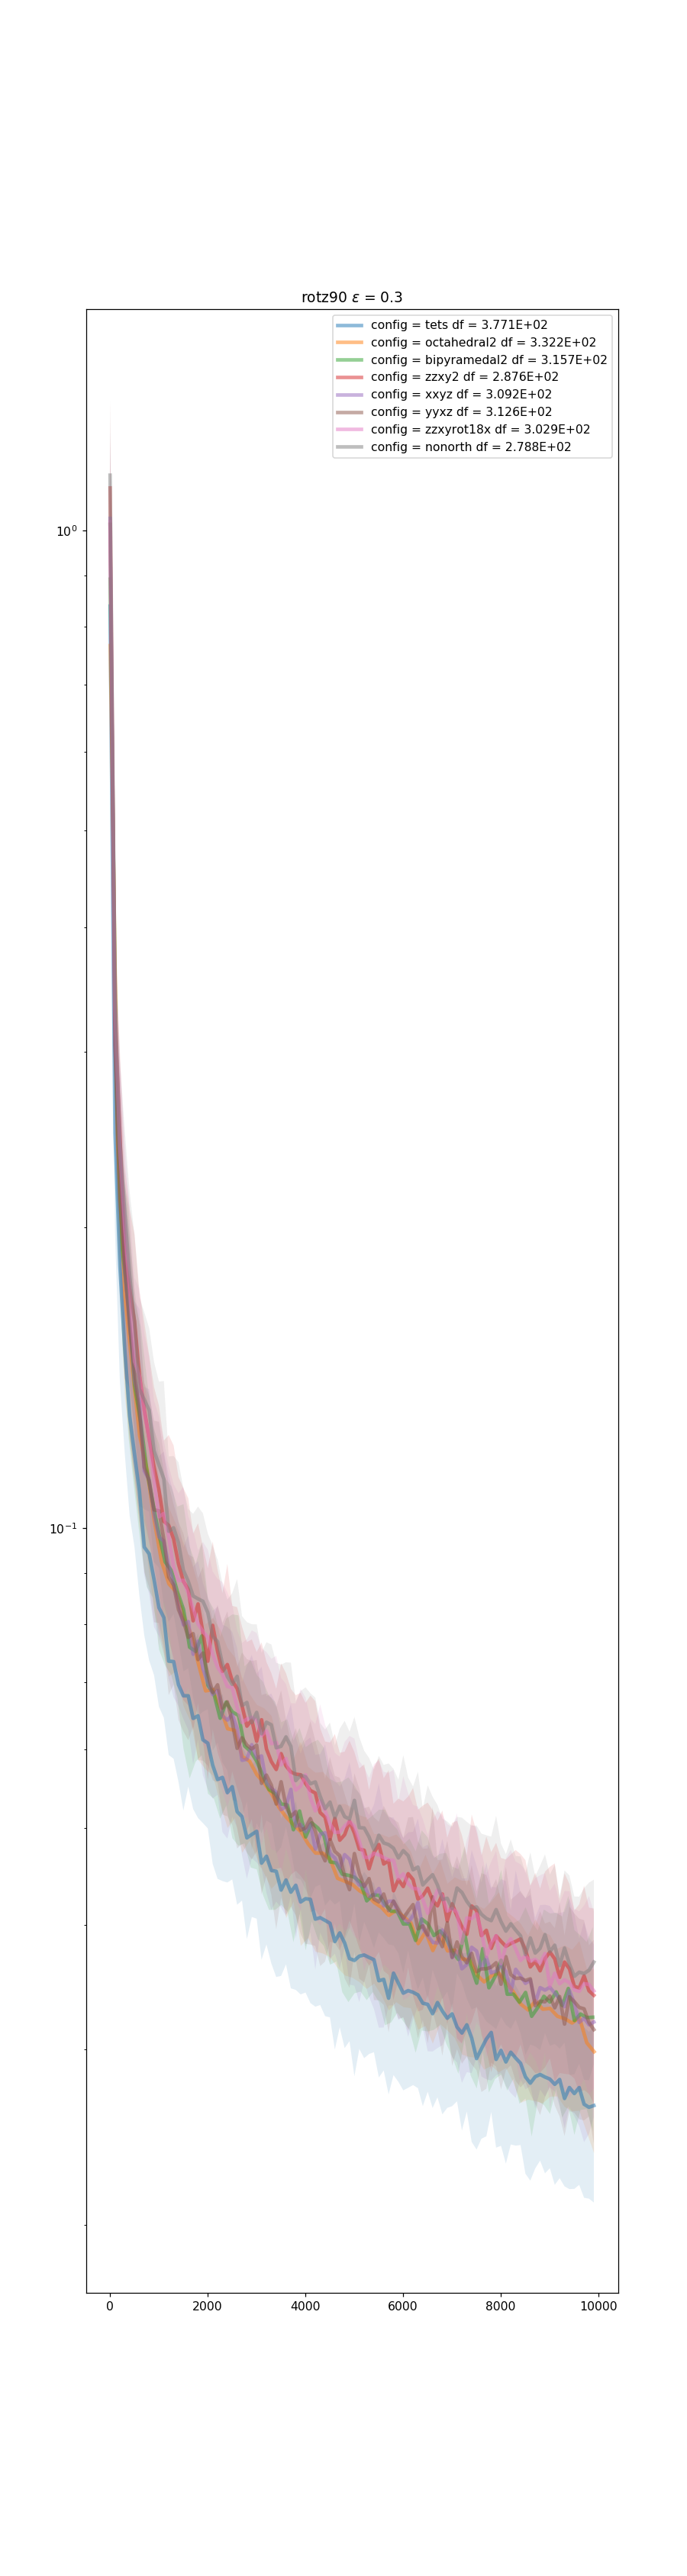

True


In [365]:
channels = {"rotz90":z_rotation}


config_dfs = {}
err_bars = {}

for noise in [0, 0.3]:
    #noise = 0.0
    #measurements = ma(np.arange(10, 10000,100),1)
    #epss = [-0.15,0, 0.15]
    fig, ax = plt.subplots(nrows=len(channels), ncols=1, figsize=(8, 30))
    if len(channels) == 1:
          ax = [ax]
    iteratiions=100
    w=1
    axis=''
    if noise == 0.3:
        axis = 'z'


    def func(x, b):
        return b*x**(-0.5)

    for chan, channel in enumerate(channels):
        epsavs = []
        epssqs = []
        for figi, config in enumerate(configs):
            m = int(40000 / len(configs[config]))
            if config == "octahedral2":
                measurements = ma(np.arange(10,m, 100), 1)*6/4
            elif config == "bipyramedal2":
                measurements = ma(np.arange(10,m, 100), 1)*5/4
            else:
                measurements = ma(np.arange(10,m, 100), 1)

            av = np.zeros_like(measurements)
            sqs = np.zeros_like(measurements)
            iterations = iteratiions
            for iteration in range(1, iterations+1, 1):
                with open("cob/{}_{}{}n_it_{}{}".format(config, channel, int(noise*100), iteration, axis), "rb") as handle:
                    dfs = pickle.load(handle)
                if len(dfs) != len(measurements):
                    iterations -= 1
                else:
                    av += np.array(dfs)
                    sqs += np.array(dfs)*np.array(dfs)

            av /= iterations
            sqs /= iterations
            epsavs.append(av)
            epssqs.append(sqs)
            
#            print(iterations)


        xcutoff = 9910  # cutoffs for fitting decay curve ansatz
        ycutoff = 3
        w2=1
        w3 = 1
        if len(epssqs) != len(epsavs):
            raise Exception("Hey, the iteration av lists aren't equal lengthwise")
        for element in range(len(epssqs)):
            epssqs[element] = np.sqrt(epssqs[element] - epsavs[element]*epsavs[element])
            

        errs = epssqs

#        print(measurements, np.sqrt(errs))


        for figi, config in enumerate(configs):

            const = int(40000 / len(configs[config]))
            if config == "octahedral2":
                measurements = ma(np.arange(10,const, 100), 1)*6/4
                print(True)
            elif config == "bipyramedal2":
                measurements = ma(np.arange(10,const, 100), 1)*5/4
            else:
                measurements = ma(np.arange(10,const, 100), 1)
                
            c1n = epsavs[figi] # index eps vals averaged
            c1ne = errs[figi]
            mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements[np.where(ma(c1n, 1) < ycutoff)]
            mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]

            mc1ne = ma(c1ne, 1)[np.where(ma(c1ne, 1) < ycutoff)]
            mc1ne = mc1ne[np.where(m < xcutoff)]


            popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1), maxfev=6000)

            #print(pcov[0][0] / popt, popt)
            slope1 = popt[0]



            ax[chan].semilogy(measurements, ma(c1n, w), '-', alpha=0.5, linewidth=3.0, label='config = {} df = {:.3E}'.format(config, 1000/slope1))
            ax[chan].fill_between(ma(measurements, w3), ma(c1n, w3)-ma(c1ne, w3), ma(c1n, w3)+ma(c1ne, w3), alpha=0.12)
            #ax.semilogy(measurements, func(measurements, slope1, a1), 'r--',alpha=0.4, linewidth=3.0, label='pfit sqpt')
            ax[chan].legend(fontsize=10)
            ax[chan].set_title(r"{} $\epsilon$ = {}".format(channel, noise))

            config_dfs["{}_{}_noise={}_axis=z-axis".format(channel, config, int(noise*100))] = 1000 / slope1

            
            
            popterr1, pcov2 = curve_fit(func, ma(m, w2), ma(mc1n, w2)-ma(mc1ne, w3), p0=(1), maxfev=6000) 
            popterr2, pcov3 = curve_fit(func, ma(m, w2), ma(mc1n, w2)+ma(mc1ne, w3), p0=(1), maxfev=6000)   # pcovs are useless variables

            slopeerr = abs(popterr1[0] - slope1) / slope1
            err_bars["{}_{}_noise={}_axis=z-axis".format(channel,config, int(noise*100))] = slopeerr
            #print(slope1, slopeerr)


       

In [373]:
err_bars

{'dephase_tets_noise=0_axis=z-axis': 0.20174099475172924,
 'dephase_octahedral2_noise=0_axis=z-axis': 0.19271544554921,
 'dephase_bipyramedal2_noise=0_axis=z-axis': 0.20748641572228324,
 'dephase_zzxy2_noise=0_axis=z-axis': 0.20672509782205106,
 'dephase_xxyz_noise=0_axis=z-axis': 0.20435795294608533,
 'dephase_yyxz_noise=0_axis=z-axis': 0.207762512282631,
 'dephase_zzxyrot18x_noise=0_axis=z-axis': 0.20836304602332475,
 'dephase_nonorth_noise=0_axis=z-axis': 0.18068095318385366,
 'dephase_tets_noise=30_axis=z-axis': 0.18940614493105581,
 'dephase_octahedral2_noise=30_axis=z-axis': 0.1868566227423094,
 'dephase_bipyramedal2_noise=30_axis=z-axis': 0.18583139068901855,
 'dephase_zzxy2_noise=30_axis=z-axis': 0.2185663395827751,
 'dephase_xxyz_noise=30_axis=z-axis': 0.19619287266077162,
 'dephase_yyxz_noise=30_axis=z-axis': 0.2107835368709565,
 'dephase_zzxyrot18x_noise=30_axis=z-axis': 0.19819755682669563,
 'dephase_nonorth_noise=30_axis=z-axis': 0.22377267198712678}

In [366]:
config_dfs.values()

dict_values([459.36585688087814, 402.5649467109734, 382.1941134621226, 366.16556362117853, 380.7858343070982, 389.6360535186737, 366.6248338316067, 338.9337000094621, 377.0935958125391, 332.21025114488793, 315.69124574383414, 287.56186301565396, 309.17351642866316, 312.6385813156499, 302.8612124659221, 278.79876507910416])

In [367]:
config_dfs.keys()

dict_keys(['rotz90_tets_noise=0_axis=z-axis', 'rotz90_octahedral2_noise=0_axis=z-axis', 'rotz90_bipyramedal2_noise=0_axis=z-axis', 'rotz90_zzxy2_noise=0_axis=z-axis', 'rotz90_xxyz_noise=0_axis=z-axis', 'rotz90_yyxz_noise=0_axis=z-axis', 'rotz90_zzxyrot18x_noise=0_axis=z-axis', 'rotz90_nonorth_noise=0_axis=z-axis', 'rotz90_tets_noise=30_axis=z-axis', 'rotz90_octahedral2_noise=30_axis=z-axis', 'rotz90_bipyramedal2_noise=30_axis=z-axis', 'rotz90_zzxy2_noise=30_axis=z-axis', 'rotz90_xxyz_noise=30_axis=z-axis', 'rotz90_yyxz_noise=30_axis=z-axis', 'rotz90_zzxyrot18x_noise=30_axis=z-axis', 'rotz90_nonorth_noise=30_axis=z-axis'])

<IPython.core.display.Javascript object>


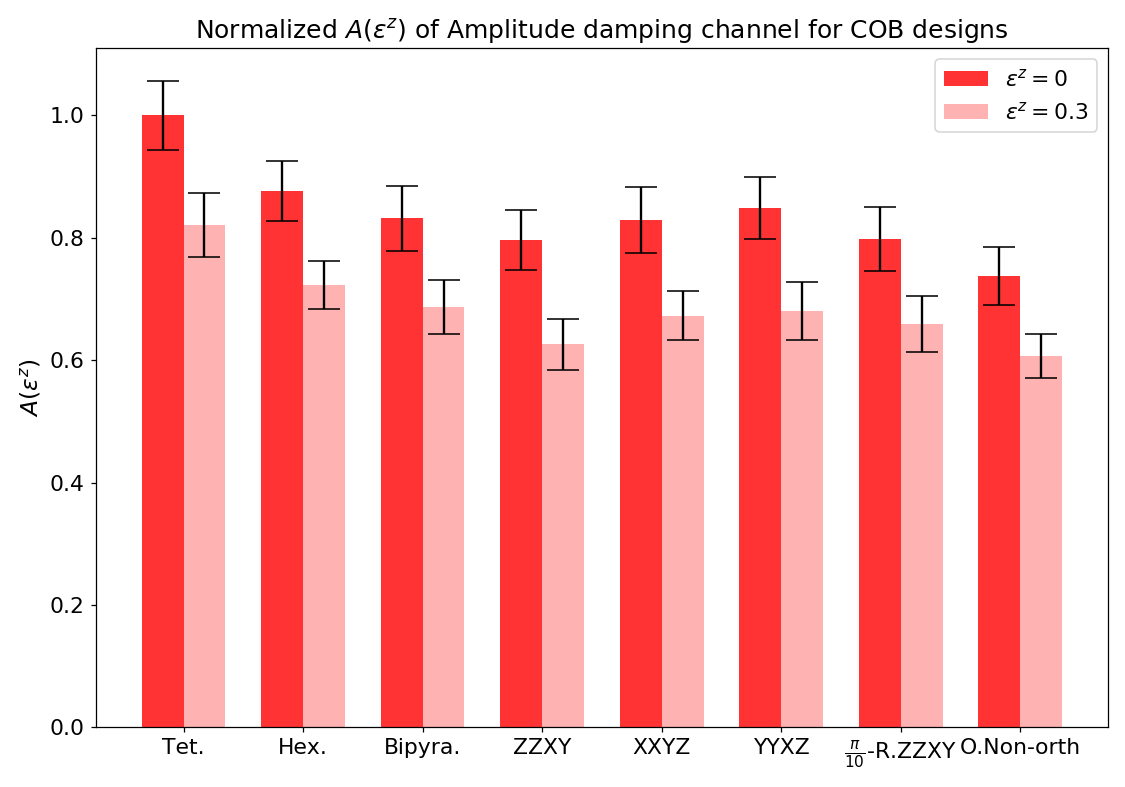

In [401]:
cons = np.array([i for i in config_dfs.values()]) / max(config_dfs.values())
error = np.array([i for i in err_bars.values()]) * cons * 0.3  # as percentage err
chann = "Amplitude damping"
labels = ["Tet.", "Hex.", "Bipyra.", "ZZXY", "XXYZ", "YYXZ", r"$\frac{\pi}{10}$-R.ZZXY", "O.Non-orth"]
#labels = labels[:int(len(labels)/2)]
e0 = cons[:int(len(cons)/2)]
e30 = cons[int(len(cons)/2):]

err0 = error[:int(len(cons)/2)]
err30 = error[int(len(cons)/2):] 

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, e0, width, label=r'$\epsilon^z=0$', yerr = err0, alpha=0.8, ecolor='black', capsize=10, color="red")
rects2 = ax.bar(x + width/2, e30, width, label=r'$\epsilon^z=0.3$', yerr = err30, alpha=0.3, ecolor='black', capsize=10, color="red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$A(\epsilon ^z)$', fontsize=15)
ax.set_title(r'Normalized $A(\epsilon ^z)$ of {} channel for COB designs'.format(chann), fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
ax.legend(fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)



fig.tight_layout()

plt.show()
#ax.set_xticklabels(labels, size=20)
#plt.tick_params(axis='both', which='major', labelsize=22)
#ax.legend(fontsize=20)

plt.savefig("cobhist.pdf", dpi=1000, bbox_inches='tight')

<IPython.core.display.Javascript object>


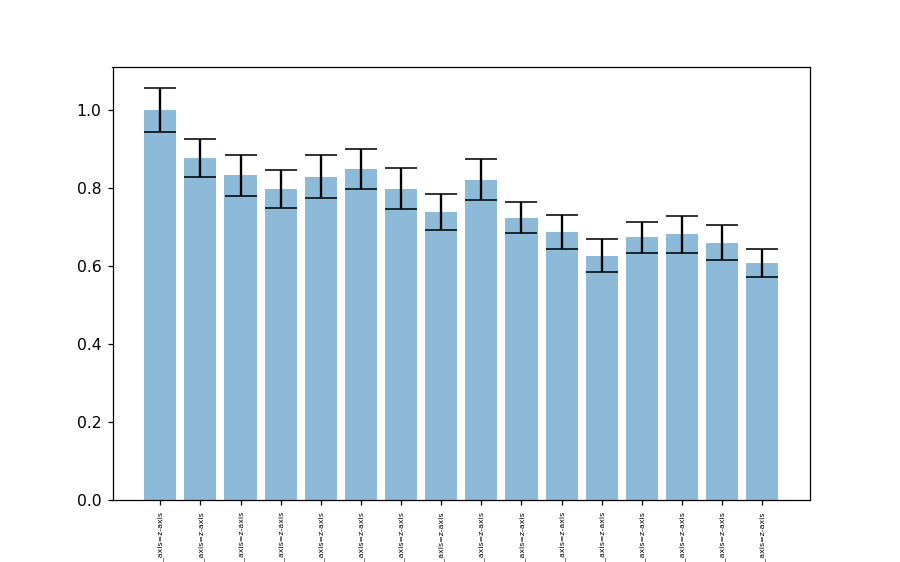

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

In [208]:
plt.figure(figsize=(8,5))
plt.bar(config_dfs.keys(), cons, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(rotation = 'vertical', fontsize=5)

In [220]:
def histcob(channels):

    config_dfs = {}
    err_bars = {}

    for noise in [0, 0.3]:
        #noise = 0.0
        #measurements = ma(np.arange(10, 10000,100),1)
        #epss = [-0.15,0, 0.15]
    
        iteratiions=100
        w=1
        axis=''
        if noise == 0.3:
            axis = 'z'


        def func(x, b):
            return b*x**(-0.5)

        for chan, channel in enumerate(channels):
            epsavs = []
            epssqs = []
            for figi, config in enumerate(configs):
                m = int(40000 / len(configs[config]))
                if config == "octahedral2":
                    measurements = ma(np.arange(10,m, 100), 1)*6/4
                elif config == "bipyramedal2":
                    measurements = ma(np.arange(10,m, 100), 1)*5/4
                else:
                    measurements = ma(np.arange(10,m, 100), 1)

                av = np.zeros_like(measurements)
                sqs = np.zeros_like(measurements)
                iterations = iteratiions
                for iteration in range(1, iterations+1, 1):
                    with open("cob/{}_{}{}n_it_{}{}".format(config, channel, int(noise*100), iteration, axis), "rb") as handle:
                        dfs = pickle.load(handle)
                    if len(dfs) != len(measurements):
                        iterations -= 1
                    else:
                        av += np.array(dfs)
                        sqs += np.array(dfs)*np.array(dfs)

                av /= iterations
                sqs /= iterations
                epsavs.append(av)
                epssqs.append(sqs)

    #            print(iterations)


            xcutoff = 9910  # cutoffs for fitting decay curve ansatz
            ycutoff = 3
            w2=1
            w3 = 1
            if len(epssqs) != len(epsavs):
                raise Exception("Hey, the iteration av lists aren't equal lengthwise")
            for element in range(len(epssqs)):
                epssqs[element] = np.sqrt(epssqs[element] - epsavs[element]*epsavs[element])


            errs = epssqs

    #        print(measurements, np.sqrt(errs))


            for figi, config in enumerate(configs):

                const = int(40000 / len(configs[config]))
                if config == "octahedral2":
                    measurements = ma(np.arange(10,const, 100), 1)*6/4
                    print(True)
                elif config == "bipyramedal2":
                    measurements = ma(np.arange(10,const, 100), 1)*5/4
                else:
                    measurements = ma(np.arange(10,const, 100), 1)

                c1n = epsavs[figi] # index eps vals averaged
                c1ne = errs[figi]
                mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements[np.where(ma(c1n, 1) < ycutoff)]
                mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]

                mc1ne = ma(c1ne, 1)[np.where(ma(c1ne, 1) < ycutoff)]
                mc1ne = mc1ne[np.where(m < xcutoff)]


                popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1), maxfev=6000)

                #print(pcov[0][0] / popt, popt)
                slope1 = popt[0]


                config_dfs["{}_{}_noise={}_axis=z-axis".format(channel, config, int(noise*100))] = 1000 / slope1



                popterr1, pcov2 = curve_fit(func, ma(m, w2), ma(mc1n, w2)-ma(mc1ne, w3), p0=(1), maxfev=6000) 
                popterr2, pcov3 = curve_fit(func, ma(m, w2), ma(mc1n, w2)+ma(mc1ne, w3), p0=(1), maxfev=6000)   # pcovs are useless variables

                slopeerr = abs(popterr1[0] - slope1) / slope1
                err_bars["{}_{}_noise={}_axis=z-axis".format(channel,config, int(noise*100))] = slopeerr
                #print(slope1, slopeerr)


    cons = np.array([i for i in config_dfs.values()]) / max(config_dfs.values())
    error = np.array([i for i in err_bars.values()]) * cons * 0.3  # as percentage err

    chann = "{}".format(channels.keys())
    labels = ["Tetrahedral", "Hexagonal", "Bipyramedal", "ZZXY", "XXYZ", "YYXZ", r"$\frac{\pi}{10}$-Rotated ZZXY", "Non-orthog"]
    #labels = labels[:int(len(labels)/2)]
    e0 = cons[:int(len(cons)/2)]
    e30 = cons[int(len(cons)/2):]

    err0 = error[:int(len(cons)/2)]
    err30 = error[int(len(cons)/2):] 

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,5))
    rects1 = ax.bar(x - width/2, e0, width, label=r'$\epsilon^z=0$', yerr = err0, alpha=0.8, ecolor='black', capsize=10, color="red")
    rects2 = ax.bar(x + width/2, e30, width, label=r'$\epsilon^z=0.3$', yerr = err30, alpha=0.3, ecolor='black', capsize=10, color="red")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(r'$A(\epsilon ^z)$')
    ax.set_title(r'Normalized $A(\epsilon ^z)$ of {} channel for COB designs'.format(chann))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    #autolabel(rects1)
    #autolabel(rects2)

    fig.tight_layout()

    plt.show()


True
True


<IPython.core.display.Javascript object>


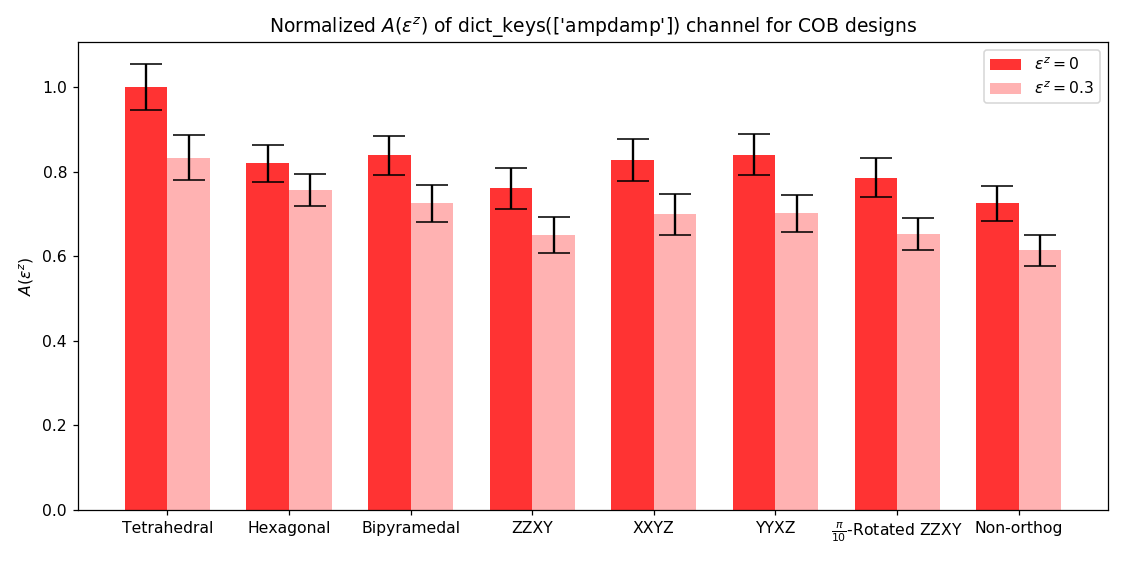

True
True


<IPython.core.display.Javascript object>


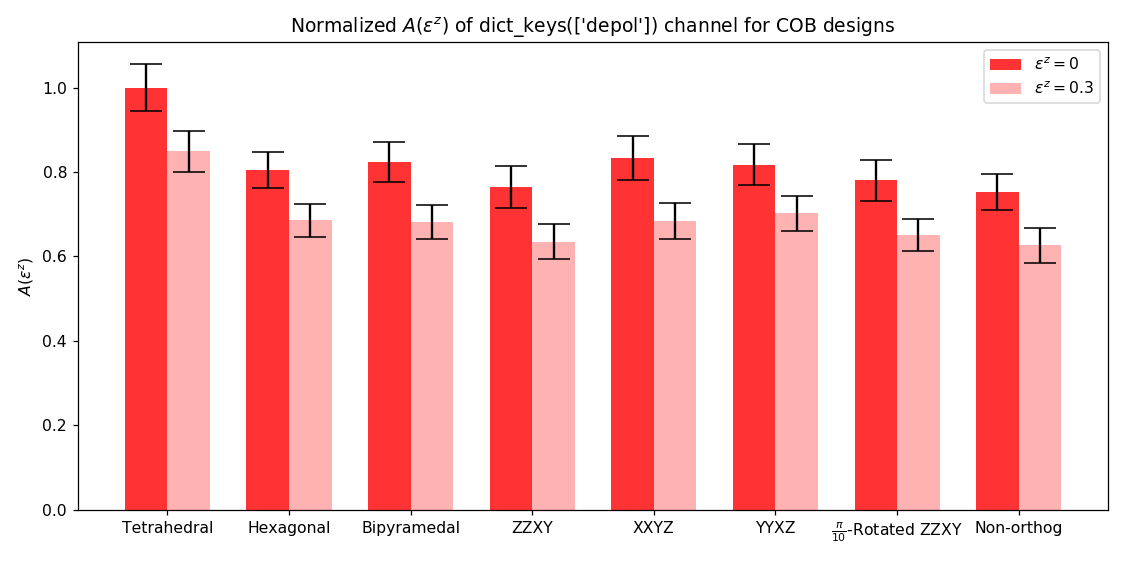

True
True


<IPython.core.display.Javascript object>


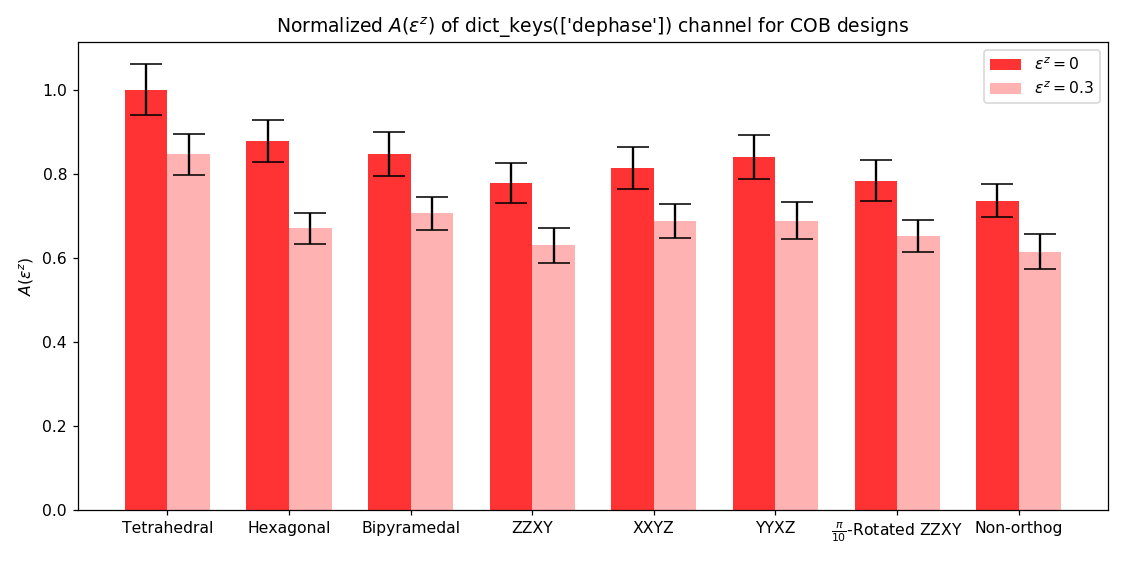

True
True


<IPython.core.display.Javascript object>


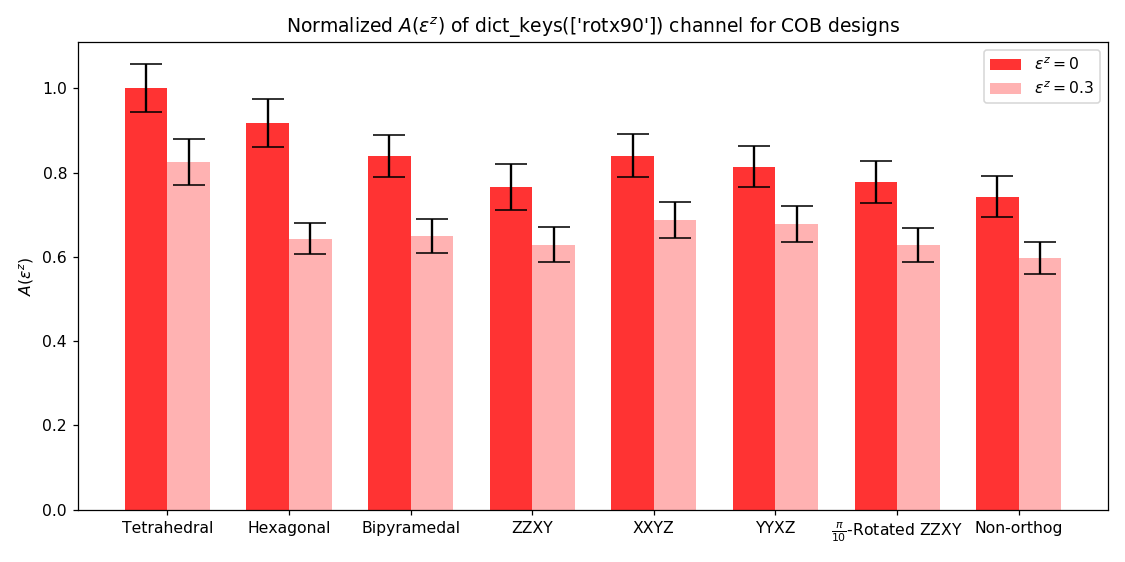

True
True


<IPython.core.display.Javascript object>


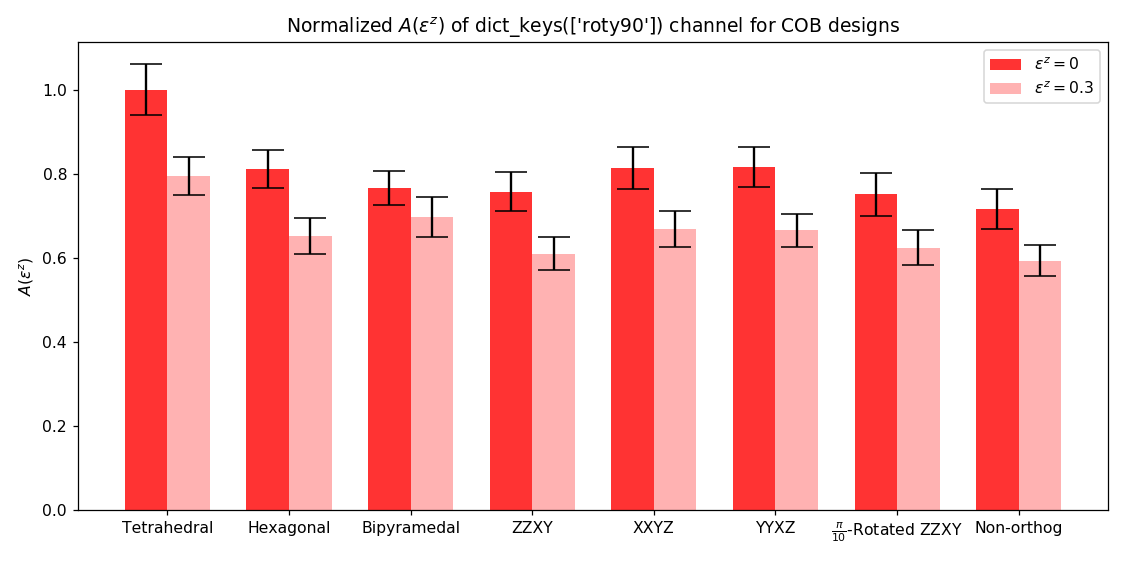

True
True


<IPython.core.display.Javascript object>


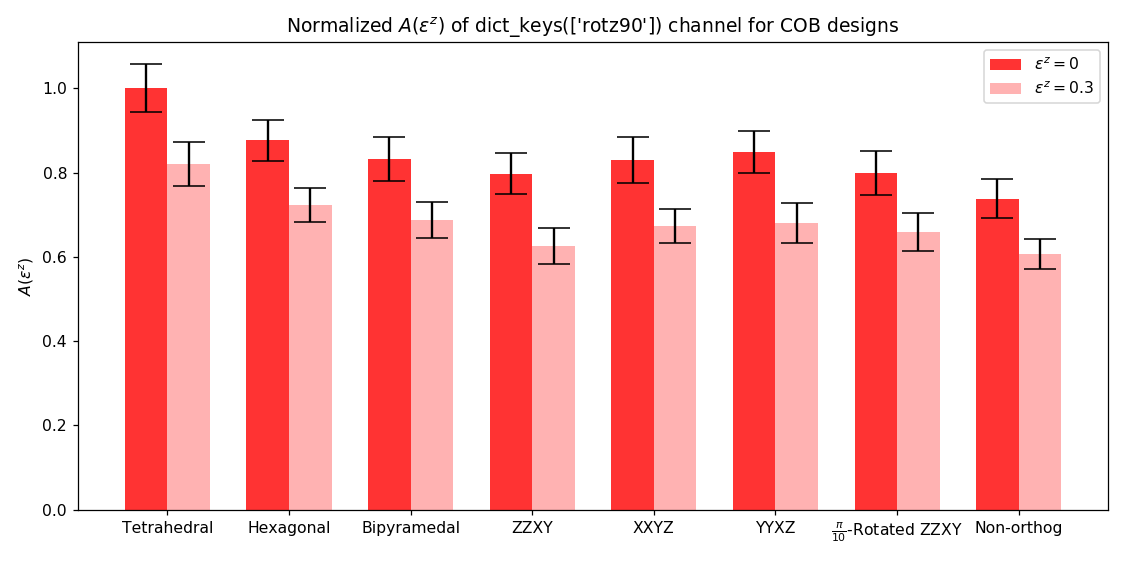

In [221]:
channels = {"ampdamp":damp, "depol":dep(0.2), "dephase":dephase, "rotx90":x_rotation, "roty90":y_rotation, "rotz90":z_rotation}
for i in channels:
    aux = {}
    aux[i] = channels[i]
    histcob(aux)